<a href="https://colab.research.google.com/github/katsoulakisstelios/heart_disease/blob/main/heart_failure_prediction_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Supervised Machine Learning Problem, For Heart Failure Prediction**

## Lets get started !!!


# **Useful tools for this Project**:

- Code from AI 14 & 15 Lab (sklearn, stats, plots, preprocessing etc)
- Code from Pandas lesson
- Numpy, Matplotlib, Seaborn lessons (+ plotly Documentation)
- Any library's documentation
- Stack Overflow, Geeksforgeeks etc
- Manos & Panos (lol)

# Importing all the libraries needed

In [3]:
import os
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
import matplotlib
matplotlib.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder

# Context

<img src="https://lirp.cdn-website.com/69c0b277/dms3rep/multi/opt/Heart-Failure-Symptoms-Causes-Complications-Diagnosis-Treatment-Prevention-PACE-Hospitals-Hyderabad-India-1920w.jpg">

Cardiovascular diseases (CVDs) are the leading cause of death worldwide, responsible for roughly 17.9 million deaths annually, about 31% of all global deaths. Around 80% of these fatalities result from heart attacks and strokes, and nearly one-third occur prematurely in individuals younger than 70. Heart failure is also a frequent consequence of CVDs.

 **This dataset contains 11 features that can be used to predict a possible heart disease.**

Individuals who have cardiovascular disease or are at elevated risk, because of factors like high blood pressure, diabetes, high cholesterol, or a history of heart-related conditions, require timely diagnosis and proper management, an area where machine learning models can provide significant support.

In [4]:
# Mount Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df=pd.read_csv("/content/drive/MyDrive/heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
df.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


In [7]:
df.dtypes

,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


As we can see the string data in the dataframe is in the form of object.
We convert it back to string to work on it, so pandas can apply string operations consistently and efficiently

In [8]:
string_col = df.select_dtypes(include="object").columns
print(string_col)

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


In [9]:
df[string_col]=df[string_col].astype("string")

In [10]:
df.dtypes

,0
Age,int64
Sex,string[python]
ChestPainType,string[python]
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,string[python]
MaxHR,int64
ExerciseAngina,string[python]
Oldpeak,float64


So, as we can see here the object data has been converted to string

## Getting the categorical columns

In [11]:
string_col=df.select_dtypes("string").columns.to_list()
print(string_col)

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [12]:
num_col=df.columns.to_list()
#print(num_col)
for col in string_col:
    num_col.remove(col)
num_col.remove("HeartDisease")
print(num_col)

['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']


The describe() function in pandas is very handy in getting various summary statistics.This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


# The Attributess include:
- **Age**: age of the patient [years]
- **Sex**: sex of the patient [M: Male, F: Female]
- **ChestPainType:** chest pain type
  - **TA (Typical Angina)** - Classic chest pain triggered by exertion or stress, relieved by rest or medication.
  - **ATA (Atypical Angina)** - Chest pain that does not fully match the typical pattern of angina.
  - **NAP (Non-Anginal Pain)** - Chest pain not related to heart problems, e.g., muscle or digestive issues.
  - **ASY (Asymptomatic)** - No chest pain, even if heart disease is present.

- **RestingBP**: resting blood pressure [mm Hg] - Πίεση αίματος
- **Cholesterol**: serum cholesterol [mm/dl]
- **FastingBS**: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise] - Γλυκόζη/Σακχαρο νηστείας
- **RestingECG**: resting electrocardiogram results
  - Normal: Normal, υγιές
  - ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), ανώμαλα κύματα
  - LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria, υπερτροφία αριστερής κοιλίας.
- **MaxHR**: maximum heart rate achieved [Numeric value between 60 and 202]
- **ExerciseAngina**: exercise-induced angina [Y: Yes, N: No] - Πόνος στο στήθος που προκαλείται από άσκηση
- **Oldpeak**: oldpeak = ST [Numeric value measured in depression]
  - Oldpeak measures how much the heart’s ECG line dips during exercise; a bigger dip can indicate more stress on the heart
- **ST_Slope**: the slope of the peak exercise ST segment (on the ECG during peak exercise in a stress test)
  - Up: upsloping (normal or less concerning)
  - Flat: flat (may indicate possible heart problems.)
  - Down: downsloping (often associated with higher risk of heart disease)
- **HeartDisease**: output class [1: heart disease, 0: Normal]

# **How to Do Machine Learning**
The full workflow of a machine learning project follows a simple but powerful sequence:
- **EDA** : exploratory data analysis to understand the structure, patterns, and potential issues in your dataset. Based on what you discover:
- **Data Preprocessing** : you preprocess the data by handling missing values, encoding categories, scaling features, and creating a clean training set.
- **Train Model** : You then train a model that learns patterns from this prepared data.
- **Evaluate** : Finally, you evaluate its performance on unseen samples to verify whether it generalizes well. This loop forms the core process used in almost every real-world ML project.
- **Repeat** : evaluation often sends you back to preprocessing to refine features, adjust transformations, or improve data quality.

This feedback loop continues until you reach a model that performs reliably and meets your project goals.

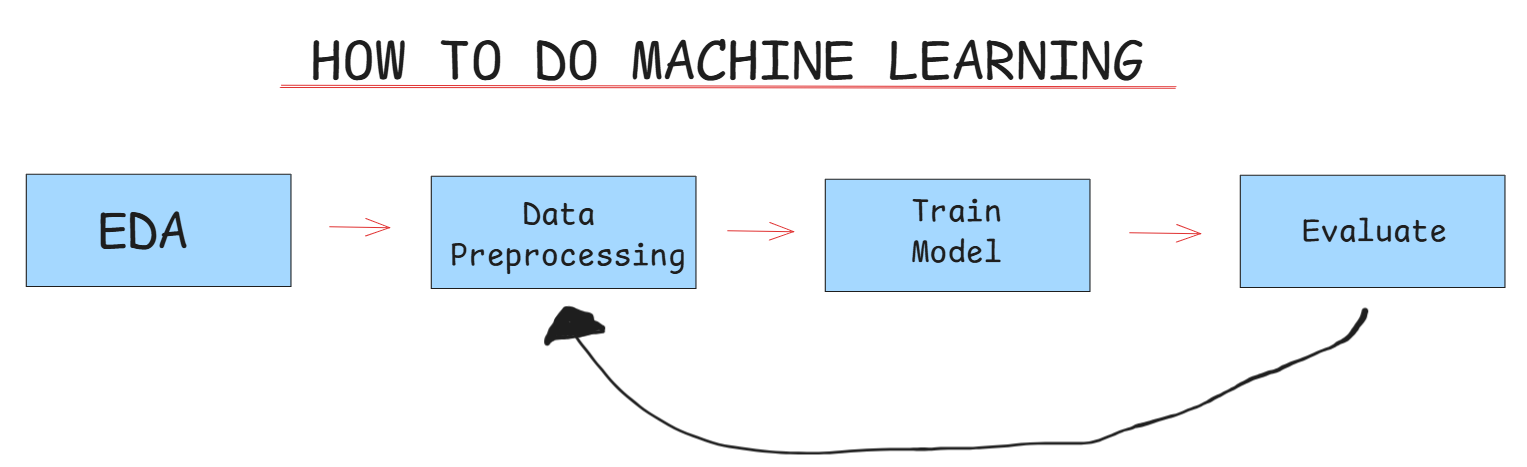

# Exploratory Data Analysis

<img src="https://blog.naveenchandra.co.in/wp-content/uploads/2023/08/eda.png">

## Why do we need EDA

EDA is crucial in:

- Understanding a given dataset so we can better clean it later later.
- Gaining clear picture of the features and the relationships between them.
- Providing guidelines for essential features and non-essential (which we are probably going to be removed) features.
- Handling Missing values or human error.
- Identifying outliers.

The EDA process is time-consuming but very important & effective in understanding the task at hand and deploying high quality Machine Learning Models



- Ποσες γραμμες ειναι (+ τυποι δεδομενων)
- head, tail
- missing values
- describe
- ειναι το dataset balanced?
- να βρω outliers, median
- στατιστικες κατανομες
- Ποσοι αντρες και ποσες γυναικες ειναι στο dataset

## In this Part of the project you will use:
- Basic pandas commands to get a sense of the dataset
- Different sorts of plots and statistical tools to visualize and gain a better understanding of the Dataset

The reason it's called EDA is because you **EXPLORE**,  so any important finding, observation or decision from this process should be written in text form (as you did in the test).

This helps both technical users (Manos & Panos) to understand your job as well as non technical users who might not know exactly how to code but want to read your work and actually understand what you did/find (for example, parents, linkedin members, **university recruiters** etc)

## Replacing Zero Cholesterol Values with the Median

In [14]:
# Calculate the median of 'Cholesterol', considering only non-zero values
median_cholesterol = df[df['Cholesterol'] > 0]['Cholesterol'].median()

# Replace zero values in 'Cholesterol' with the calculated median
df['Cholesterol'] = df['Cholesterol'].replace(0, median_cholesterol)

print(f"Median Cholesterol (excluding zeros): {median_cholesterol}")
print("DataFrame after replacing zero Cholesterol values:")
display(df.head())

display(df.describe().T)


Median Cholesterol (excluding zeros): 237.0
DataFrame after replacing zero Cholesterol values:


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.0,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.0,130.0,140.0,200.0
Cholesterol,918.0,243.204793,53.401297,85.0,214.0,237.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.0,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.0,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.0,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.0,1.0,1.0,1.0


## Use Basic exploratory commands in Pandas

Use commands like .shape, .info, .value_counts() **and others** (even if we used some above) to get a basic sense of the dataset. **Maximize** your information gain using all these simple commands

In [15]:
df.shape

(918, 12)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    string 
 2   ChestPainType   918 non-null    string 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    string 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    string 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    string 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), string(5)
memory usage: 86.2 KB


In [17]:
df.value_counts()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease
77   M    ASY            125        304          0          LVH         162    Y                0.0     Up        1               1
28   M    ATA            130        132          0          LVH         185    N                0.0     Up        0               1
29   M    ATA            120        243          0          Normal      160    N                0.0     Up        0               1
                         130        204          0          LVH         202    N                0.0     Up        0               1
                         140        263          0          Normal      170    N                0.0     Up        0               1
30   F    TA             170        237          0          ST          170    N                0.0     Up        0               1
72   M    NAP            120        214          0          Normal      102    Y                1.0     Flat      1               1
          ASY            160        123          1          LVH         130    N                1.5     Flat      1               1
                         143        211          0          Normal      109    Y                1.4     Flat      1               1
71   M    NAP            144        221          0          Normal      108    Y                1.8     Flat      1               1
          ASY            130        221          0          ST          115    Y                0.0     Flat      1               1
     F    NAP            110        265          1          LVH         130    N                0.0     Up        0               1
          ATA            160        302          0          Normal      162    N                0.4     Up        0               1
          ASY            112        149          0          Normal      125    N                1.6     Flat      0               1
70   M    NAP            160        269          0          Normal      112    Y                2.9     Flat      1               1
          ATA            156        245          0          LVH         143    N                0.0     Up        0               1
          ASY            170        192          0          ST          129    Y                3.0     Down      1               1
                         145        174          0          Normal      125    Y                2.6     Down      1               1
                         140        237          1          Normal      157    Y                2.0     Flat      1               1
                         130        322          0          LVH         109    N                2.4     Flat      1               1
                         115        237          0          ST          92     Y                0.0     Flat      1               1
69   M    TA             160        234          1          LVH         131    N                0.1     Flat      0               1
36   M    NAP            150        160          0          Normal      172    N                0.0     Up        0               1
                         130        209          0          Normal      178    N                0.0     Up        0               1
                         112        340          0          Normal      184    N                1.0     Flat      0               1
          ATA            120        267          0          Normal      160    N                3.0     Flat      1               1
                                    166          0          Normal      180    N                0.0     Up        0               1
          ASY            110        237          1          Normal      125    Y                1.0     Flat      1               1
35   M    NAP            123        161          0          ST          153    N               -0.1     Up        0               1
          ATA            150        264      

In [18]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,918.0,NaN,NaN,NaN,53.510893,9.432617,28.0,47.0,54.0,60.0,77.0
Sex,918,2,M,725,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ChestPainType,918,4,ASY,496,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RestingBP,918.0,NaN,NaN,NaN,132.396514,18.514154,0.0,120.0,130.0,140.0,200.0
Cholesterol,918.0,NaN,NaN,NaN,243.204793,53.401297,85.0,214.0,237.0,267.0,603.0
FastingBS,918.0,NaN,NaN,NaN,0.233115,0.423046,0.0,0.0,0.0,0.0,1.0
RestingECG,918,3,Normal,552,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MaxHR,918.0,NaN,NaN,NaN,136.809368,25.460334,60.0,120.0,138.0,156.0,202.0
ExerciseAngina,918,2,N,547,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Oldpeak,918.0,NaN,NaN,NaN,0.887364,1.06657,-2.6,0.0,0.6,1.5,6.2


From these we understand that:
*   There are 918 values in the dataset and 12 columns
*   There are no missing values in the dataset
*   There are float, int and string values in the dataset
*   We can also find the mean, median and std for all of the columns that don't have string values







## Distribution of Heart Disease with respect to Sex



We show 2 different ways (using 1) seaborn, matplotlib, 2) plotly) to find the Distribution of Heat Diseases with respect to male and female. Pick the one template that suits you most. Use it for the following tasks that will be asked. Notice that plotly makes the plots **interactive**



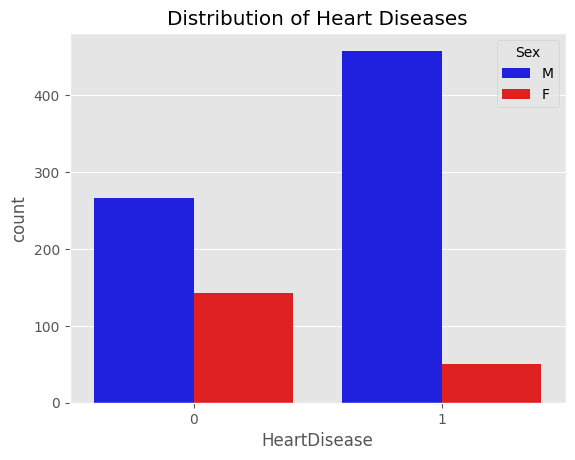

In [19]:
#seaborn + matplotlib
sns.countplot(data=df, x='HeartDisease', hue='Sex', palette=['blue', 'red'])
plt.title('Distribution of Heart Diseases')
plt.show()


In [20]:
# plotly
fig=px.histogram(df,
                 x="HeartDisease",
                 color="Sex",
                 hover_data=df.columns,
                 title="Distribution of Heart Diseases",
                 barmode="group")
fig.show()

### **Example Interpretation**

- Males appear far more often in both classes, especially in the heart disease group.  
- This tells us that **sex is not balanced in the dataset** and will likely be an important feature.  
- It also reminds us to be careful, because the model might learn patterns mostly from male examples.

## Distribution of Types of Chest Pain with respect to Sex

Create a similar plot as above but for the different types of chest Pain

In [21]:
fig=px.histogram(df,
                 x="ChestPainType",
                 color="Sex",
                 hover_data=df.columns,
                 title="Distribution of Types of Chest Pain",
                 barmode="group")
fig.show()

- Males appear far more often in all the classes, especially in the ASY and NAP group.  
- This tells us that **chest pain is not balanced in the dataset** and will likely be an important feature.  
- It also reminds us to be careful, because the model might learn patterns mostly from male examples.

## Distribution of Resting ECG

Create a similar plot as above but for the different types of Resting ECG (**disregard sex here**)

In [22]:
fig=px.histogram(df,
                 x="RestingECG",
                 color="RestingECG",
                 hover_data=df.columns,
                 title="Distribution of Resting ECG",
                 barmode="group")
fig.show()

- Patients with normal resting ECG appear far more often than patients with anhy other type of resting ECG
- It also reminds us to be careful, because the model might learn patterns mostly from normal examples.

## Sex Ratio in the Data

Create a bar plot (or count plot or group plot) that shows the number of females and males in the dataset (sex ratio)

In [23]:
fig=px.histogram(df,
                 x="Sex",
                 color="Sex",
                 hover_data=df.columns,
                 title="Sex Ratio",
                 barmode="group")
fig.show()


**YOUR INTERPRETATION HERE**

## Pairplot: Visual Overview of Feature Relationships

A pairplot lets us see how every feature relates to every other feature.  
Each scatter plot shows the relationship between two features, colored by Heart Disease (the target).  
This helps us visually spot patterns, clusters, and any unusual points introduced by the noise.  
It's a quick way to understand the structure of the dataset before cleaning.

You can look up **AI 14** notebook for this one

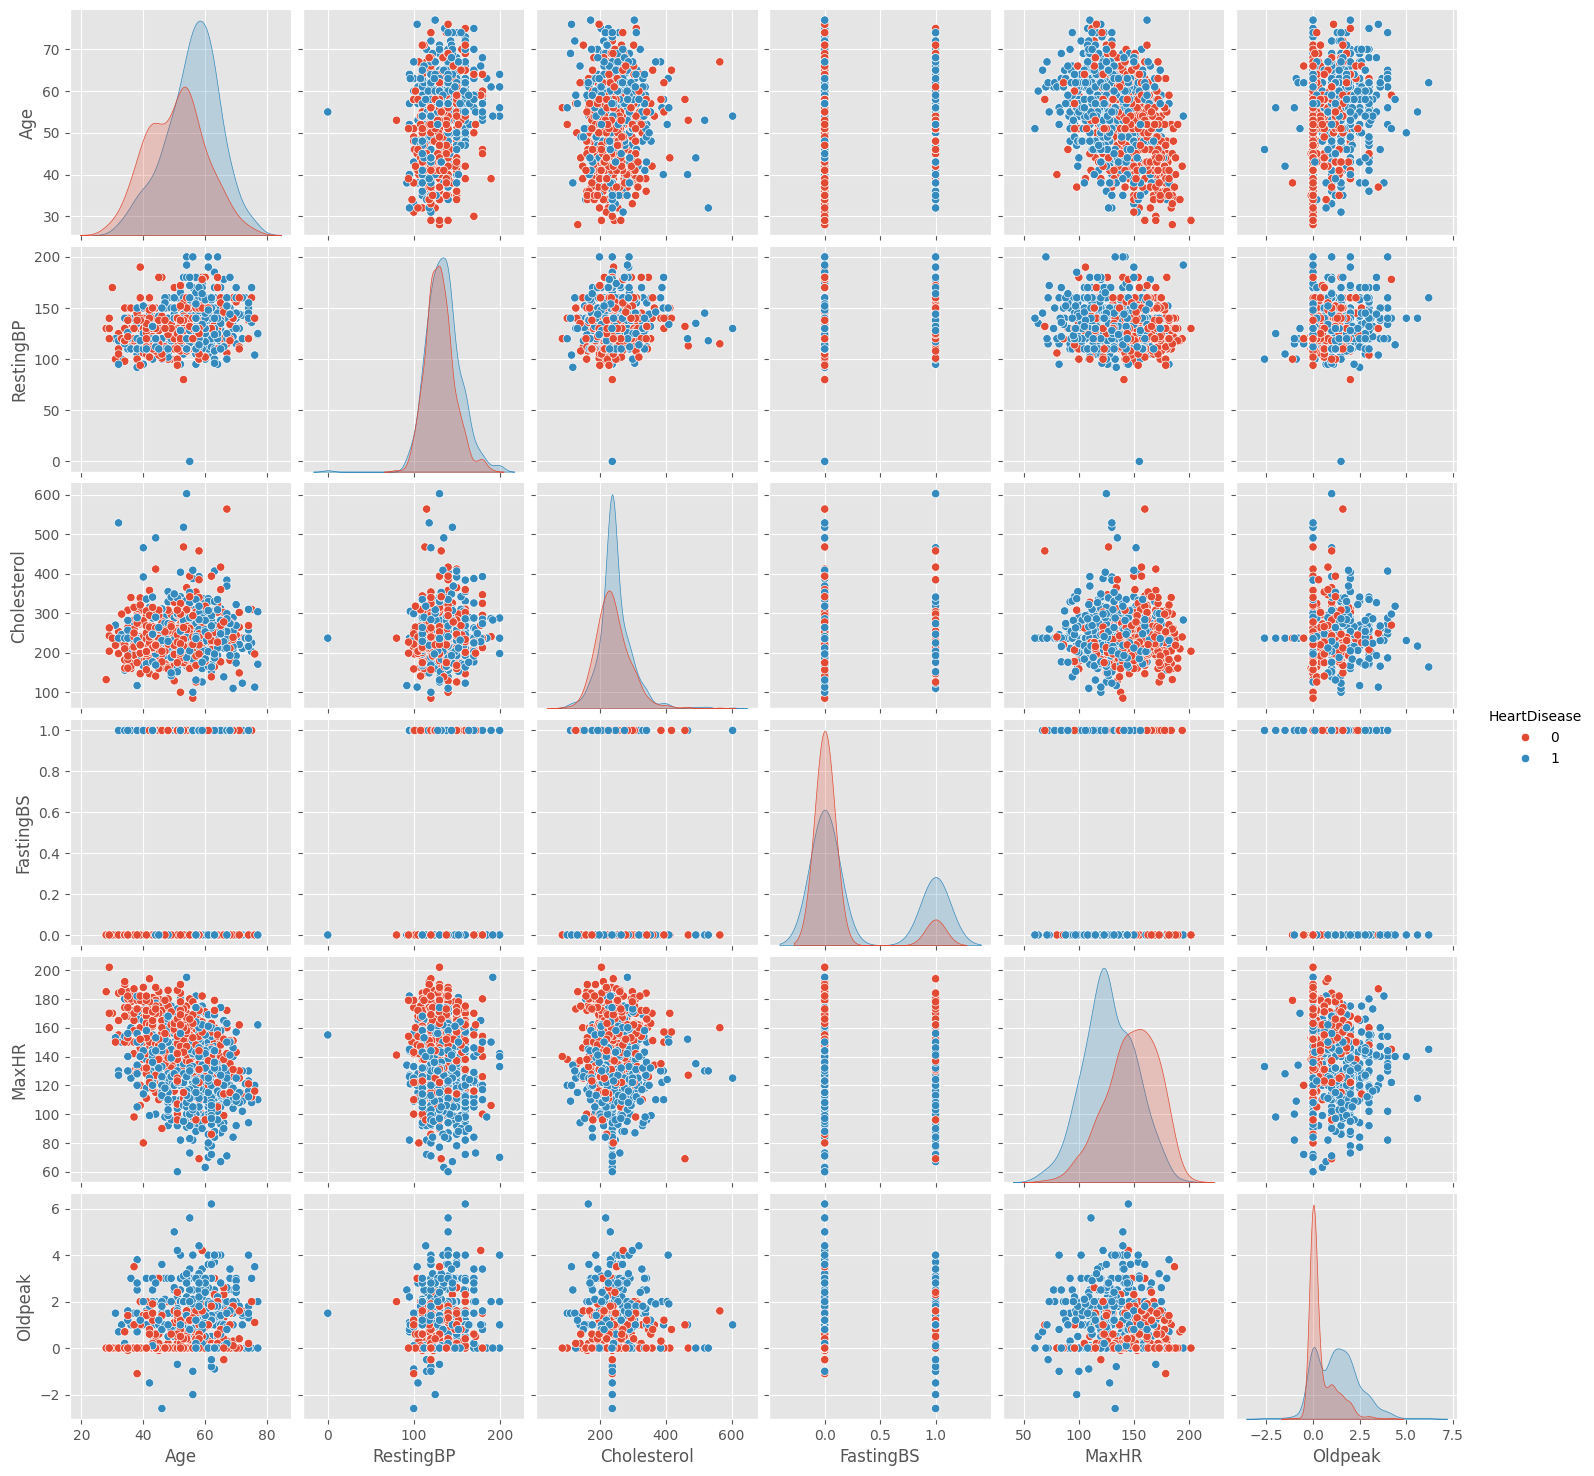

In [24]:
sns.pairplot(df, hue='HeartDisease')
plt.show()


**YOUR INTERPRETATION HERE**

## Histograms: Understanding Each Feature on Its Own

Histograms show how the values of a single feature are distributed.  
They help us quickly see patterns such as skewed data, outliers, or unusual spikes introduced by noise.  
By looking at each feature separately, we understand its range, its common values, and whether it needs transformations like scaling or normalization before modeling.

We haven't looked on how to create histograms. You will have to find it out yourself. Create a histogram for every feature (as well as for the output label). One figure (many subplots - histograms)

- **Hint 1** : Use matplotlib + sns
- **Hint 2** : There is plenty of documentation and examples online. Resist the temptation to use an LLM (chatgpt, claude, gemini etc)
- **Hint 3** : Use a for loop
- **Hint 4** : The diagonal plots in **pairplots** are the so called histograms.

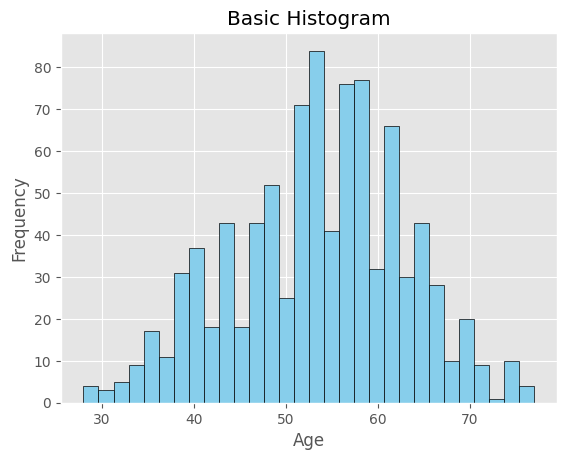

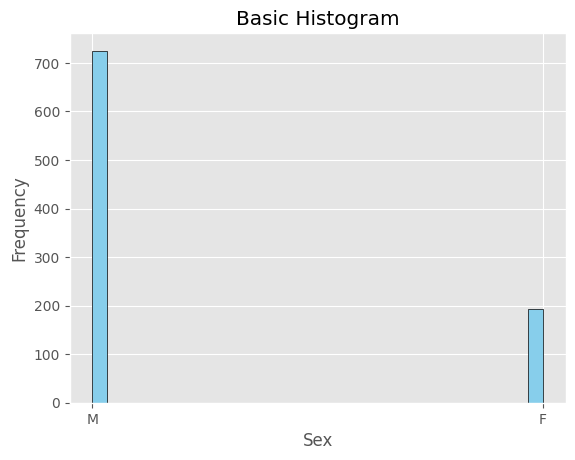

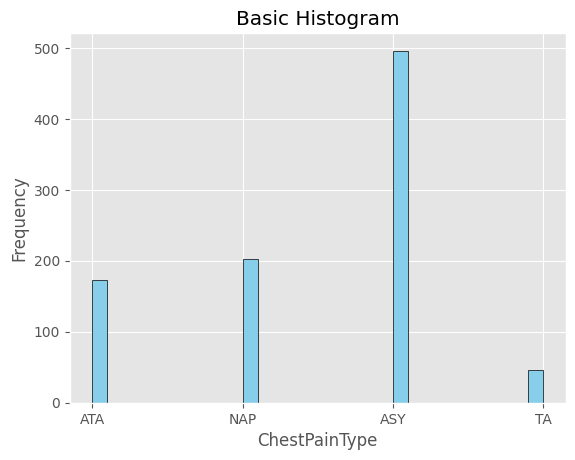

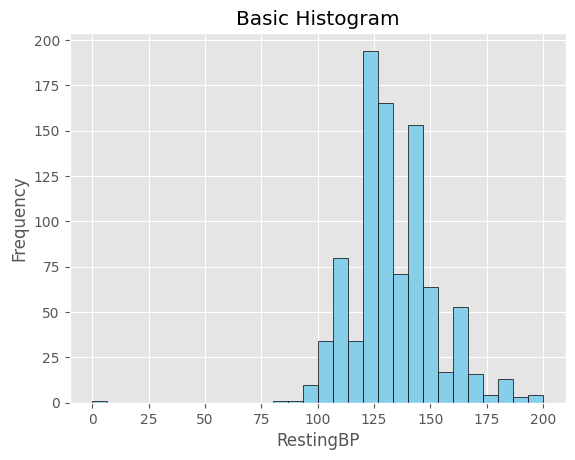

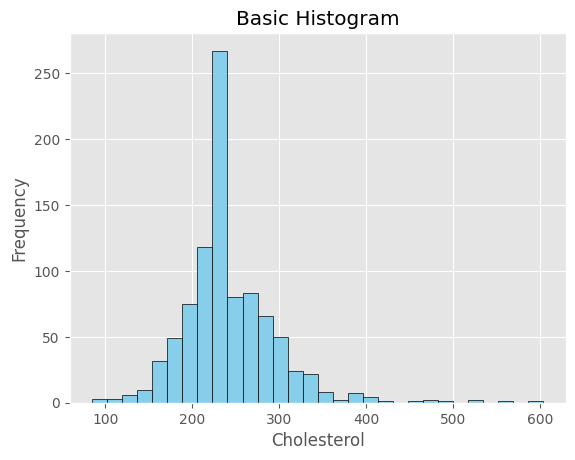

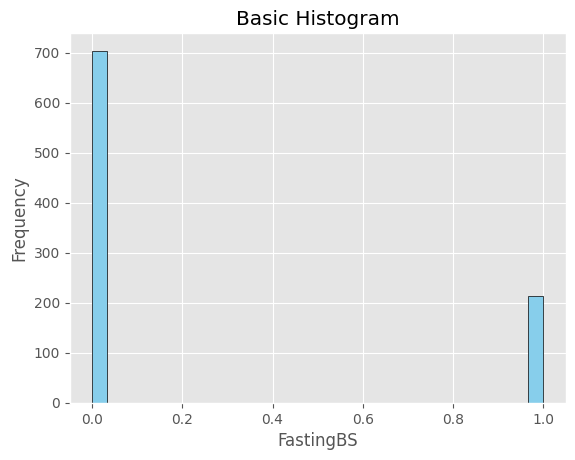

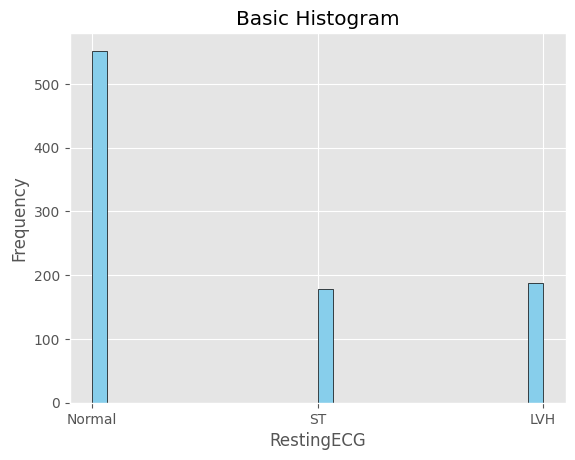

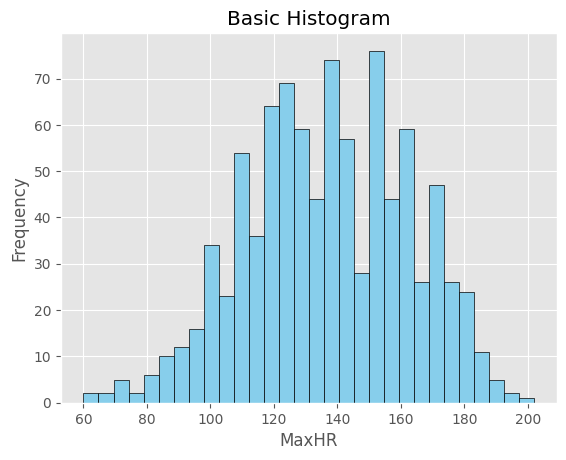

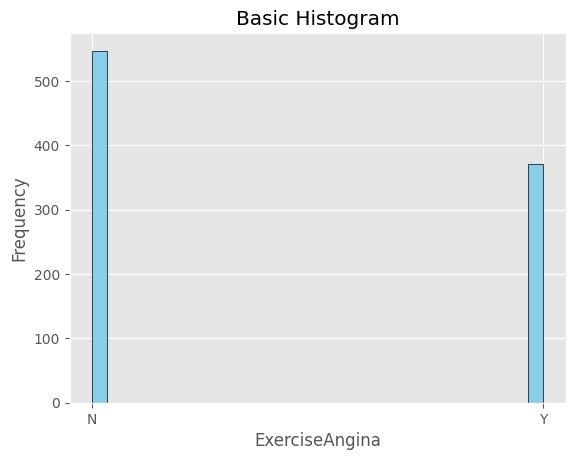

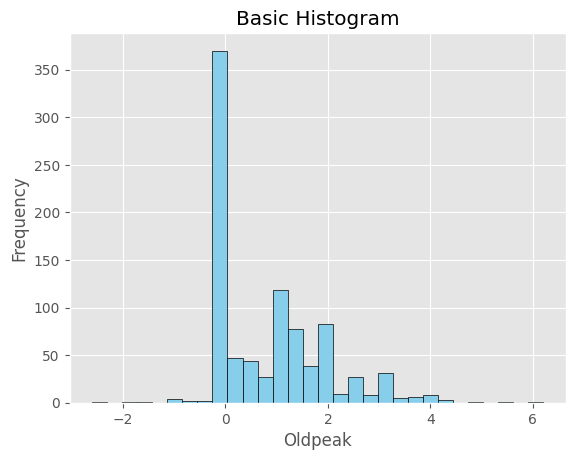

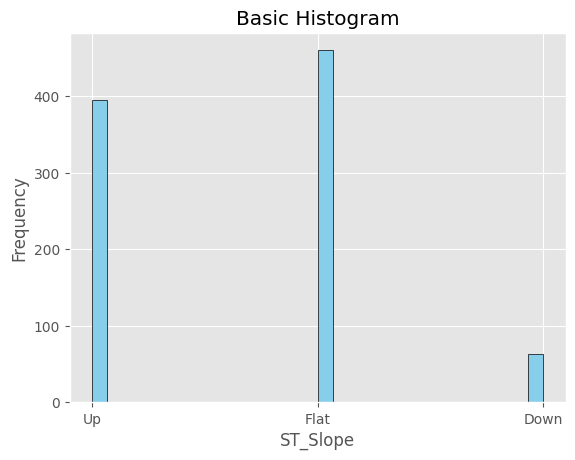

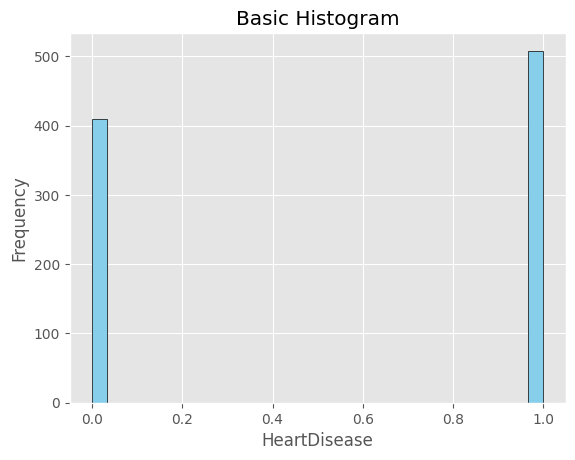

In [25]:
for i in df.columns:
  plt.hist(df[i], bins=30, color='skyblue', edgecolor='black')

  # Adding labels and title
  plt.xlabel(i)
  plt.ylabel('Frequency')
  plt.title('Basic Histogram')

  # Display the plot
  plt.show()

**YOUR INTERPRETATION HERE**

## Outliers - Using Box plots as a simple visual tool helps us:

- See the **distribution** of each feature.
- Spot **outliers** (values unusually far from the rest of the data).
- Compare the **spread** and **range** across features.

A box plot shows the:
- median
- the upper/lower quartiles
- points that lie far from the main group

It's ideal for quickly identifying irregular or outlier values.


## Distribution of Age with respect to Heart Disease

We show 2 different ways (using seaborn/matplotlib and plotly) to find the Distribution of Age with respect to Heart Disease using a **boxplot**. Pick the one template that suits you most. Use it for the following tasks that will be asked. Notice that plotly makes the plots **interactive**

**Don't Forget to Interpret the result (even the one given here)**

In [26]:
fig = px.box(df,y="Age",x="HeartDisease",title=f"Distrubution of Age with respect to Heart Disease'")
fig.show()

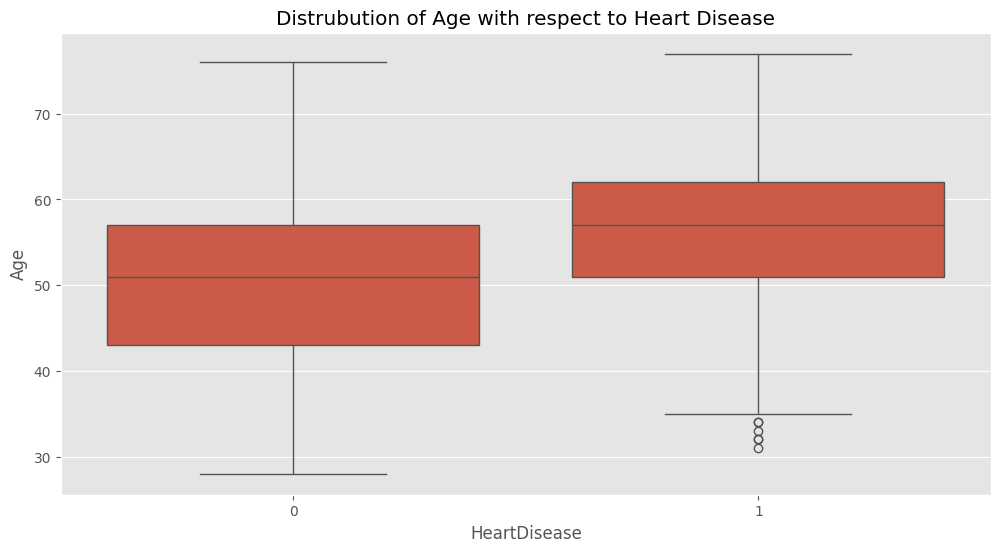

In [27]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="HeartDisease", y="Age")
plt.title('Distrubution of Age with respect to Heart Disease')
plt.xlabel('HeartDisease')
plt.ylabel('Age')
plt.xticks()
plt.show()

We notice that age doesn't play a role in heart disease. This is because there is a wide range of ages in both people with and without heart disease. However, we can notice that as the age increases so do the people that have heart disease.



## Distribution of RestingBP with respect to HeartDisease

In [28]:
fig = px.box(df,y="RestingBP",x="HeartDisease",title=f"Distrubution of RestingBP with respect to Heart Disease'")
fig.show()

We can notice that the distribution of Resting BP is around the same for both people with and without heart disease. Thus, Resting BP may not be a very useful feature in the detection of heart disease.

## Distribution of Cholesterol with respect to HeartDisease

In [29]:
fig = px.box(df,y="Cholesterol",x="HeartDisease",title=f"Distribution of Cholesterol with respect to HeartDisease")
fig.show()

We notice that the distribution for people with heart disease is very big and contains many extreme values. In comparison, it is much smaller for people without heart disease.

## Distribution of OldPeak with respect to HeartDisease

In [30]:
fig = px.box(df,y="Oldpeak",x="HeartDisease",title=f"Distribution of OldPeak with respect to HeartDisease")
fig.show()

We notice that the distribution of Oldpeak for people without Heart Disease is very small. In comparison, the distribution of people with heart disease is much bigger and contains some extreme values. Thus, Oldpeak may be a feature we could use to determine whether a person has a heart disease or not.

## Distribution of MaxHR with respect to HeartDisease

In [31]:
fig = px.box(df,y="MaxHR",x="HeartDisease",title=f"Distribution of MaxHR with respect to HeartDisease")
fig.show()

We notice that the Max HR is a little bit higher for people without heart disease than those with heart disease. This shows that MaxHR may be a good feature in identifying whether a person has heart disease or not.

## Let's talk about Correlation
<img src="https://www.simplypsychology.org/wp-content/uploads/correlation-coefficient.jpg">
<img src="https://www.statlect.com/images/linear-correlation-coefficient.png">

## Correlation: Quick Intuition  
Correlation measures how two numerical features move together.  
It answers the question:

**When feature A increases, does feature B also increase, decrease, or stay unrelated?**

The result is a number between **-1 and 1**:

- **+1**: Strong positive relationship (When A goes up, B always goes up)
- **0**: No relationship (Knowing A tells you nothing about B)
- **-1**: Strong negative relationship (When A goes up, B always goes down)

Correlation helps us understand which features might be connected or predictive.
It is not **causation**. It just shows patterns.
---

## Why Correlation Matters in Machine Learning  
Understanding correlation is useful before training a model because it helps you:

### 1. Detect highly related features  
If two features have a very high correlation (for example 0.9), they contain almost the same information.  
Keeping both can create unnecessary complexity and sometimes hurt model performance.  
This is why we often remove or combine highly correlated features.

### 2. Identify important relationships  
A feature that has a strong correlation with the target variable (label) might be a good predictor.

### 3. Spot strange or unexpected patterns  
A sudden strong correlation between unrelated features can indicate data issues, such as errors or mislabeling.

---

## Why We Use a Heatmap  
A heatmap gives a visual overview of all pairwise correlations in one figure.

- Strong relationships appear with intense colors  
- Weak relationships appear with faded colors  
- Each square shows the exact correlation value  

This helps us quickly see which features move together, which might be unnecessary, and which might be useful for prediction.

**For Example**
<img src="https://community.tableau.com/sfc/servlet.shepherd/version/renditionDownload?rendition=THUMB720BY480&versionId=0688b00000S14wJ&operationContext=CHATTER&contentId=05T8b00001UE9lW&page=0">

## **YOUR TASK**
- Compute the correlation matrix using df.corr()
- Visualize it with a heatmap using Seaborn, matplotlib
- Look for strong positive or strong negative values
- Write a short interpretation of interesting correlations


In [32]:
df.corr(numeric_only=True)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,0.045535,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.084532,0.070193,-0.112135,0.164803,0.107589
Cholesterol,0.045535,0.084532,1.000000,0.024917,-0.001600,0.054500,0.076114
FastingBS,0.198039,0.070193,0.024917,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,-0.001600,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.054500,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,0.076114,0.267291,-0.400421,0.403951,1.000000


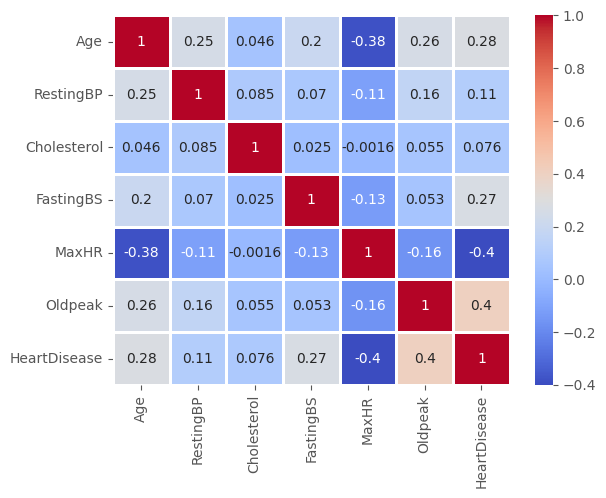

In [33]:
sns.heatmap(df.corr(numeric_only = True), linecolor='white', linewidths=1, annot=True, cmap="coolwarm")
plt.show()

There is not a very a strong correlation between many of the features, but some features have a pretty strong correlation between them. This fact could help us simplify the dataset. Moreover, there is a strong correlation between some features and the label. This helps us understand which features are more important when we try to build our model.



## **GREAT!**

So far, so good. You should be able to have a basic understanding of the dataset with what you've seen so far. However, **Feel free to explore any part of the data you want to examine more closely, especially areas where you are unsure or curious about how the values behave.**

---

## This is the end so far. Next week we are going to focus on Data preprocessing.

For your information below is an example of why correlation is not causation
## Correlation vs Causation: Simple Example

Imagine these two facts:

1. **When ice cream sales go up, drowning accidents also go up.**  
2. The correlation between them is strong and positive.

This looks like:  
**More ice cream → more drowning accidents**

But this is not true. Ice cream does **not** cause drowning.

The real cause is a hidden factor: **hot weather**  
- When the weather is hot, more people buy ice cream  
- When the weather is hot, more people go swimming  
- More swimming means more risk of accidents

So the correlation is real, but the cause is something else.

This teaches us:
- A strong correlation does not automatically mean one thing causes the other  
- Sometimes a third factor explains both  

# Data Preprocessing

<img src="https://framerusercontent.com/images/tcuop20H7fupm3w8fgxSMfql1vc.png">

## Why do we need Data Preprocessing
Real world data is often messy, incomplete, inconsistent, or in formats that are not directly usable by machine learning algorithms. Data preprocessing makes the dataset clean, structured, and more informative which leads to faster training, better model performance, and more reliable results.

### Key parts of data preprocessing (**usually performed in that order**)

- **Data Integration**: Combine data from multiple sources into a single consistent dataset.

- **Data Cleaning**: Fix errors and handle missing or noisy values so the data becomes reliable.

- **Data Transformation**: Scale, normalize, or encode features so algorithms can learn effectively.

- **Data Reduction or Dimension Reduction**: Remove unnecessary features or dimensions to simplify the model and improve efficiency.

The concepts that we will cover in this project are:

- Handling Null Values (Data Cleaning)
- Feature Scaling (Data Transformation)
- Handling Categorical Variables (Data Transformation)
- Data Reduction (if you find necessary to remove any of the features from your **EDA**)

## 1. Handling Null Values

Before cleaning the data, we first check how many missing values each feature contains.  
This helps us understand how incomplete the dataset is and whether we can fix the issues without losing too many ro

Missing values are handled differently for the **target** and the **features**:

- **Target column:**  
  Rows with missing target values are **removed**, since we cannot train a model without a label.

- **Feature columns:**  
  Missing values are filled with the **mean** of each feature, allowing us to keep useful rows and maintain the dataset’s overall structure.

Are there any missing values?

Notebook on AI 14 has a more thorough analysis + code on Missing Values




In [34]:
print("Missing values by feature before cleaning:")
print(df.isnull().sum())

Missing values by feature before cleaning:
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


There eare no missing values in the dataset.

## 2. Handling Categorical Values

Handling Categorical Variables

We know that computers do not understand text data as is and thus, we need to convert the above categories to numbers. A simple way of doing that can be to use :
- **One Hot Encoding**
<img src="https://i.imgur.com/mtimFxh.png">

```
# pd.get_dummies()
```
or
- **Label Encoding**

<img src="https://ai-ml-analytics.com/wp-content/uploads/2020/08/encoding-3.png">

```
# from sklearn.preprocessing import LabelEncoder
```



**We pick a method, depending on the category's nature and/or the model we want to train.**



## In General..

For **not Tree based Machine Learning Algorithms** the best way to go will be to use **One-Hot Encoding**

- **One-Hot Encoding** has the advantage that it produces binary (independent) columns instead of assigning an artificial order, which is important for categorical features that have no natural ranking. The disadvantage is that for high cardinality, the feature space can really blow up quickly and you start fighting with the curse of dimensionality.

- **LabelEncoder** on the other hand can turn [bad, ok, good, very bad, very good] into [1, 2, 3, 0, 4], which assigns a numerical order that reflects the ranking or severity in the categories. For tree based algorithms, this approach is usually sufficient even when the feature is not truly ordinal, since trees split based on thresholds rather than interpreting numeric distances.

In [35]:
## let's remember which features are categorical
string_col = df.select_dtypes(include="string").columns
print(string_col)

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')


## 2.1 Apply **Label Ecoding** which will be used with Tree Based Algorthms (create a new df from the original df). Use .head and .info() so you can see the derived dataframe and interpret it.

In [36]:
from sklearn.preprocessing import LabelEncoder
df_copy = df.copy()
data_label_encoded = df_copy.apply(LabelEncoder().fit_transform)

In [37]:
## view the derived dataframe and interpret it
data_label_encoded.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,41,146,0,1,98,0,10,2,0
1,21,0,2,55,39,0,1,82,0,20,1,1
2,9,1,1,31,140,0,2,25,0,10,2,0
3,20,0,0,39,71,0,1,34,1,25,1,1
4,26,1,2,49,52,0,1,48,0,10,2,0


In [38]:
data_label_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             918 non-null    int64
 1   Sex             918 non-null    int64
 2   ChestPainType   918 non-null    int64
 3   RestingBP       918 non-null    int64
 4   Cholesterol     918 non-null    int64
 5   FastingBS       918 non-null    int64
 6   RestingECG      918 non-null    int64
 7   MaxHR           918 non-null    int64
 8   ExerciseAngina  918 non-null    int64
 9   Oldpeak         918 non-null    int64
 10  ST_Slope        918 non-null    int64
 11  HeartDisease    918 non-null    int64
dtypes: int64(12)
memory usage: 86.2 KB


**Your Intepretation Here**

We can use the above df directly in many tree-based models:

- Decision trees
- Random forest

Or any kind of boosted trees model

- XGBoost
- GBM
- LightGBM

This type of encoding cannot be used in linear models, support vector machines, KNN or neural networks as they expect data to be normalized (or standardized). For these types of models, we can binarize the data

## 2.2 Apply **One hot Encoding**, for working with non tree based algorithms (create a new df from the original df). Use .head and .info() so you can see the derived dataframe and interpret it.

- Note : One Hot Encoder by default adds the new columns at the end. That's why we first need to remove the target, do the encoding, and then add it back at the end

In [39]:
## 1. Separate the target column from the features
target = "HeartDisease"
df_hot_encoding = df.copy()
## YOUR CODE HERE
X = df_hot_encoding.drop(target, axis='columns')
y = df_hot_encoding[target]


## 2. One Hot Encode only the categorical feature columns
## YOUR CODE HERE
X_encoded = pd.get_dummies(X, columns=X.select_dtypes("string").columns.to_list(), drop_first=False)

## 3. Merge encoded features (X_encoded) with the target (y) in a new df
newdf = pd.concat([X_encoded, y], axis=1)
newdf.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,...,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,40,140,289,0,172,0.0,False,True,False,True,...,False,False,True,False,True,False,False,False,True,0
1,49,160,180,0,156,1.0,True,False,False,False,...,False,False,True,False,True,False,False,True,False,1
2,37,130,283,0,98,0.0,False,True,False,True,...,False,False,False,True,True,False,False,False,True,0
3,48,138,214,0,108,1.5,True,False,True,False,...,False,False,True,False,False,True,False,True,False,1
4,54,150,195,0,122,0.0,False,True,False,False,...,False,False,True,False,True,False,False,False,True,0


In [40]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   Sex_F              918 non-null    boolean
 7   Sex_M              918 non-null    boolean
 8   ChestPainType_ASY  918 non-null    boolean
 9   ChestPainType_ATA  918 non-null    boolean
 10  ChestPainType_NAP  918 non-null    boolean
 11  ChestPainType_TA   918 non-null    boolean
 12  RestingECG_LVH     918 non-null    boolean
 13  RestingECG_Normal  918 non-null    boolean
 14  RestingECG_ST      918 non-null    boolean
 15  ExerciseAngina_N   918 non-null    boolean
 16  ExerciseAngina_Y   918 non

**Your Interpretation Here**

## 3. Feature Scaling

**Feature scaling** is important because different features in a dataset can have very different numeric ranges, and many machine learning algorithms are sensitive to these differences. If one feature has values in the hundreds while another has values less than one, the model may place too much emphasis on the larger-scale feature.


**Your Task**

- Search and learn about the main scaling techniques used in machine learning, including normalization and standardization (such as Min-Max scaling, Z-score standardization, and Robust scaling).
- Understand what each method does, the types of problems they solve, and explain them in simple terms.


*   Min-Max Scaling transforms features by subtracting the minimum value and dividing by the difference between the maximum and minimum values. This method maps feature values to a specified range, commonly 0 to 1, preserving the original distribution shape but is still affected by outliers due to reliance on extreme values.

*   Z-score standardization centers features by subtracting the mean and scales them by dividing by the standard deviation. This assumption of normal distribution often benefits models like linear regression, logistic regression and neural networks by improving convergence speed and stability. The z-score of x is the number of standard deviations x is from the mean. It is effective for data that are approximately normally distributed.

*   Robust Scaling uses the median and interquartile range (IQR) instead of the mean and standard deviation making the transformation robust to outliers and skewed distributions. It is highly suitable when the dataset contains extreme values or noise.


https://www.geeksforgeeks.org/machine-learning/feature-engineering-scaling-normalization-and-standardization/




## **Moving Forward!**

Great progress so far. With EDA and preprocessing (almost) complete, you now have a clean, well-understood dataset. From here, feel free to revisit the data whenever something seems interesting or unclear. Curiosity helps build intuition.

Next, we will finish data preprocessing by handling outliers, scaling features and move into model training where we will use what we have learned to build and evaluate predictive models.

# **Heart Failure Prediction - Model Training & Evaluation**

## Let's Build Some Models! 🚀

In this notebook, we'll:
- Split our data into training and test sets
- Train multiple machine learning models
- Evaluate and compare their performance
- Select the best model for heart disease prediction

<img src="https://miro.medium.com/v2/resize:fit:1400/1*cG6U1qstYDijh9bPL42e-Q.jpeg" width="600">

In [41]:
# Visualization
import plotly.graph_objects as go

# Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Evaluation metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, auc,
    roc_auc_score
)

# Set style
plt.style.use('ggplot')
sns.set_palette("husl")

print("All libraries imported successfully! ✓")

All libraries imported successfully! ✓


## Suppose df_label is the dataframe at the end of your data preprocessing step.

# Train-Test Split: Why Do We Need It?

<img src="https://miro.medium.com/v2/resize:fit:1400/1*-8_kogvwmL1H6ooN1A1tsQ.png" width="600">

## The Problem
If we train and test on the same data, our model will **memorize** the answers instead of **learning patterns**. This is like:
- 📚 Memorizing exam questions instead of understanding concepts
- 🎮 Playing a game level you've already seen vs. a new level

## The Solution: Train-Test Split

We split our data into two parts:

### Training Set (typically 70-80%)
- Used to **train** the model
- Model learns patterns from this data
- Model **sees the answers** here

### Test Set (typically 20-30%)
- Used to **evaluate** the model
- Model has **never seen** this data before
- Tells us how well the model generalizes to new patients

## Important Rules 🚨
1. **Never train on test data** - That's cheating!
2. **Split BEFORE any preprocessing** that uses statistics (like scaling)
3. **Use the same split** for fair comparison between models
4. **Stratify** when classes are imbalanced (keeps the same proportion in both sets)

## How It Works
```python
train_test_split(X, y, test_size=0.2, random_state=42)
```
- `test_size=0.2`: Use 20% for testing, 80% for training
- `random_state=42`: Makes the split reproducible (same split every time)
- `stratify=y`: Keeps class proportions balanced in both sets

## Train-Test Split

In [42]:
# Split your dataset into training and testing subsets. Use a test size of 20%. Research what "stratify" is and decide if you should implement it in your case
X_onehot = newdf.drop("HeartDisease", axis='columns')
y_onehot = newdf["HeartDisease"]
X_label = data_label_encoded.drop("HeartDisease", axis='columns')
y_label = data_label_encoded["HeartDisease"]

X_train_onehot, X_test_onehot, y_train_onehot, y_test_onehot = train_test_split(X_onehot, y_onehot, test_size=0.2, random_state=42, stratify=y)
X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42, stratify=y)



# Feature Scaling: Making Features Comparable


## Why Scale?

Imagine you're comparing patients:
- Age: 28-77 years
- Cholesterol: 100-600 mg/dl
- Oldpeak: 0-6.2

Without scaling, Cholesterol dominates because its numbers are bigger!

## Which Models Need Scaling?

### ✅ Need Scaling:
- **KNN**: Uses distances between points
- **SVM**: Uses distances to find decision boundary
- **Logistic Regression**: Gradient descent works better with scaled features
- **Naive Bayes**: Can benefit from scaling in some implementations

### ❌ Don't Need Scaling:
- **Decision Trees**: Split on thresholds, not distances
- **Random Forest**: Ensemble of decision trees

## Important: Scale AFTER Splitting! 🚨

```python
# ❌ WRONG - Information leakage!
X_scaled = scaler.fit_transform(X)
X_train, X_test = train_test_split(X_scaled)

# ✅ CORRECT - No leakage
X_train, X_test = train_test_split(X)
scaler.fit(X_train)  # Learn only from training
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
```

Να αιτιολογήσω με μία πρόταση γιατί επιλέγω standard scaler.

In [43]:
# Identify numerical columns that need scaling
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
# Initialize the scaler
scaler = StandardScaler()
# Fit on training data ONLY
scaler.fit(X_train_onehot[numerical_cols])

X_train_scaled = X_train_onehot.copy()
X_test_scaled = X_test_onehot.copy()
# Transform both train and test
X_train_scaled[numerical_cols] = scaler.transform(X_train_onehot[numerical_cols])
X_test_scaled[numerical_cols] = scaler.transform(X_test_onehot[numerical_cols])
# Print the numerical columns that you scales before and after the scaling
print(X_test_scaled[numerical_cols].head())
print(X_train_scaled[numerical_cols].head())


          Age  RestingBP  Cholesterol     MaxHR   Oldpeak
356 -0.831954  -0.989299    -0.145286 -0.905584  0.601071
763  0.440022  -0.048409    -0.384968  1.418673  2.210549
817  0.652018  -0.435834     0.241892  0.179069  1.831848
735 -0.513960  -0.712567    -1.048703  0.101594  1.074447
892 -1.573940   0.283669    -0.458716  0.605183 -0.819056
          Age  RestingBP  Cholesterol     MaxHR   Oldpeak
485  0.970012   0.339016    -0.514028 -0.324520  0.317046
486  0.122028  -1.266031    -0.569339  1.689837 -0.440356
117  0.546020  -0.159102     1.716858 -0.247045  0.601071
361 -0.725956   1.501291    -0.145286 -0.479470 -0.819056
296 -0.407962   0.671094    -0.145286  0.101594 -0.156330


# Machine Learning Models Overview

You'll train 6 different models. Each has different strengths!

| Model | Type | Best For | Key Strength |
|-------|------|----------|-------------|
| **Logistic Regression** | Linear | Baseline, interpretability | Simple, fast, probabilistic |
| **Decision Tree** | Tree | Non-linear patterns | Easy to visualize and interpret |
| **Random Forest** | Ensemble | Robust predictions | Reduces overfitting, handles complexity |
| **Naive Bayes** | Probabilistic | Small datasets | Fast, works with high dimensions |
| **SVM** | Margin-based | Complex boundaries | Powerful for non-linear problems |
| **KNN** | Instance-based | Local patterns | Simple, no training phase |

<img src="https://miro.medium.com/v2/resize:fit:1400/1*m6kKsW0O-wWH8Xg_ZA3v8w.png" width="700">

# 1️⃣ Logistic Regression (Baseline Model)

## What is it?
Despite its name, Logistic Regression is used for **classification**, not regression!

## How it works:
- Draws a **linear decision boundary** between classes
- Outputs **probabilities** (0 to 1) instead of just class labels
- Uses a sigmoid function to squash predictions between 0 and 1

## Why start here?
- ✅ Simple and fast
- ✅ Good baseline to beat
- ✅ Provides probability estimates
- ✅ Interpretable coefficients

## When to use:
- Linear relationships between features
- Need probability scores
- Want to understand feature importance

<img src="https://miro.medium.com/v2/resize:fit:828/1*dm6ZaX5fuSmuVvM4Ds-vcg.gif" width="400">

In [44]:
# Initialize the model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train_scaled, y_train_onehot)

# Make predictions
y_pred_log = log_reg.predict(X_test_scaled)
y_pred_proba_log = log_reg.predict_proba(X_test_scaled)[:, 1]  # Probability of class 1

# Calculate accuracy
accuracy_log = accuracy_score(y_test_onehot, y_pred_log)

print("Logistic Regression Results:")
print(f"Accuracy: {accuracy_log:.4f} ({accuracy_log*100:.2f}%)")
print("\nFirst 10 predictions vs actual:")
comparison = pd.DataFrame({
    'Actual': y_test_onehot.values[:10],
    'Predicted': y_pred_log[:10],
    'Probability': y_pred_proba_log[:10]
})
print(comparison)

Logistic Regression Results:
Accuracy: 0.8967 (89.67%)

First 10 predictions vs actual:
   Actual  Predicted  Probability
0       1          1     0.951000
1       1          0     0.124845
2       1          1     0.963377
3       1          1     0.552918
4       0          0     0.139257
5       0          0     0.406587
6       0          0     0.022168
7       1          0     0.475333
8       0          0     0.024032
9       1          1     0.982133


# 2️⃣ Decision Tree

## What is it?
A tree of yes/no questions that leads to a prediction!

## How it works:
```
Is Oldpeak > 1.0?
├── Yes → Is MaxHR < 140?
│   ├── Yes → Heart Disease ❤️
│   └── No → Healthy ✅
└── No → Healthy ✅
```

## Advantages:
- ✅ Very interpretable (you can visualize the tree!)
- ✅ Handles non-linear relationships
- ✅ No feature scaling needed
- ✅ Can capture complex interactions

## Disadvantages:
- ❌ Prone to overfitting (memorizing training data)
- ❌ Unstable (small data changes = different tree)
- ❌ Can create overly complex trees

<img src="https://miro.medium.com/v2/resize:fit:1170/1*XMId5sJqPtm8-RIwVVz2tg.png" width="500">

In [45]:
# Initialize the model
tree = DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the model
tree.fit(X_train_label, y_train_label)

# Make predictions
y_pred_tree = tree.predict(X_test_label)
y_pred_proba_tree = tree.predict_proba(X_test_label)[:, 1]  # Probability of class 1

# Calculate accuracy
accuracy_tree = accuracy_score(y_test_label, y_pred_tree)

print("Decision Tree Results:")
print(f"Accuracy: {accuracy_tree:.4f} ({accuracy_tree*100:.2f}%)")
print("\nFirst 10 predictions vs actual:")
comparison = pd.DataFrame({
    'Actual': y_test_label.values[:10],
    'Predicted': y_pred_tree[:10],
    'Probability': y_pred_proba_tree[:10]
})
print(comparison)

Decision Tree Results:
Accuracy: 0.8043 (80.43%)

First 10 predictions vs actual:
   Actual  Predicted  Probability
0       1          1     0.959459
1       1          1     1.000000
2       1          1     0.959459
3       1          0     0.415094
4       0          1     0.714286
5       0          0     0.415094
6       0          0     0.012579
7       1          1     0.756098
8       0          0     0.012579
9       1          1     0.959459


# 3️⃣ Random Forest

## What is it?
**"Wisdom of the Crowd"** - Many decision trees voting together!

## How it works:
1. Create 100 different decision trees (each sees random subset of data)
2. Each tree makes a prediction
3. Take a **majority vote** (most common prediction wins)

```
Tree 1: Heart Disease ❤️
Tree 2: Heart Disease ❤️  
Tree 3: Healthy ✅         } → Final: Heart Disease ❤️
Tree 4: Heart Disease ❤️  
...     
Tree 100: Heart Disease ❤️
```

## Why it's powerful:
- ✅ Reduces overfitting (trees average out their mistakes)
- ✅ More stable than single decision tree
- ✅ Handles complex patterns
- ✅ Provides feature importance
- ✅ One of the best "out-of-the-box" models

## Trade-offs:
- ❌ Less interpretable (can't visualize 100 trees easily)
- ❌ Slower to train and predict
- ❌ Needs more memory

<img src="https://miro.medium.com/v2/resize:fit:1092/1*i0o8mjFfCn-uD79-F1Cqkw.png" width="600">

In [46]:
# Initialize the model
forest = RandomForestClassifier(n_estimators=100, max_depth=4, min_samples_split=2, min_samples_leaf=1, random_state=42)

# Train the model
forest.fit(X_train_label, y_train_label)

# Make predictions
y_pred_forest = forest.predict(X_test_label)
y_pred_proba_forest = forest.predict_proba(X_test_label)[:, 1]  # Probability of class 1

# Calculate accuracy
accuracy_forest = accuracy_score(y_test_label, y_pred_forest)

print("Random Forest Results:")
print(f"Accuracy: {accuracy_forest:.4f} ({accuracy_forest*100:.2f}%)")
print("\nFirst 10 predictions vs actual:")
comparison = pd.DataFrame({
    'Actual': y_test_label.values[:10],
    'Predicted': y_pred_forest[:10],
    'Probability': y_pred_proba_forest[:10]
})
print(comparison)

Random Forest Results:
Accuracy: 0.8641 (86.41%)

First 10 predictions vs actual:
   Actual  Predicted  Probability
0       1          1     0.912115
1       1          0     0.275873
2       1          1     0.907476
3       1          1     0.604080
4       0          0     0.453484
5       0          0     0.464981
6       0          0     0.071532
7       1          1     0.618190
8       0          0     0.121770
9       1          1     0.931523


# 4️⃣ Naive Bayes

## What is it?
A probabilistic model based on Bayes' Theorem. It calculates the probability of a patient having heart disease given their features.

## How it works:
For each patient, it calculates:
```
P(Heart Disease | Features) = P(Features | Heart Disease) × P(Heart Disease) / P(Features)
```

## The "Naive" Part:
Assumes all features are **independent** (they don't influence each other)
- Example: Assumes Age and Cholesterol are independent
- This is often false but works surprisingly well anyway!

## Advantages:
- ✅ Very fast to train and predict
- ✅ Works well with small datasets
- ✅ Good with high-dimensional data
- ✅ Provides probability estimates

## When to use:
- Small training datasets
- Need fast predictions
- Text classification (spam detection, sentiment analysis)

<img src="https://miro.medium.com/v2/resize:fit:1400/1*tjcmj9cDQ-rHXAtxCu5bRQ.png" width="500">

In [47]:
# Initialize the model
naive_bayes = GaussianNB()
# Train the model
naive_bayes.fit(X_train_scaled, y_train_onehot)

# Make predictions
y_pred_nb = naive_bayes.predict(X_test_scaled)
y_pred_proba_nb = naive_bayes.predict_proba(X_test_scaled)[:, 1]  # Probability of class 1

# Calculate accuracy
accuracy_nb = accuracy_score(y_test_onehot, y_pred_nb)

print("Naive Bayes Results:")
print(f"Accuracy: {accuracy_nb:.4f} ({accuracy_nb*100:.2f}%)")
print("\nFirst 10 predictions vs actual:")
comparison = pd.DataFrame({
    'Actual': y_test_onehot.values[:10],
    'Predicted': y_pred_nb[:10],
    'Probability': y_pred_proba_nb[:10]
})
print(comparison)

Naive Bayes Results:
Accuracy: 0.8750 (87.50%)

First 10 predictions vs actual:
   Actual  Predicted   Probability
0       1          1  9.999960e-01
1       1          0  1.343130e-02
2       1          1  9.999999e-01
3       1          1  5.167388e-01
4       0          0  4.614882e-05
5       0          1  9.999850e-01
6       0          0  3.062051e-10
7       1          0  6.965141e-03
8       0          0  6.291060e-08
9       1          1  9.999998e-01


# 5️⃣ Support Vector Machine (SVM)

## What is it?
Finds the **best line** (or hyperplane) that separates the two classes with the **maximum margin**.

## How it works:
1. Find the line that separates classes
2. Maximize the distance to the nearest points from each class
3. These nearest points are called **support vectors**

## The Kernel Trick 🎩:
Can handle non-linear boundaries using kernels:
- **Linear**: Straight line separation
- **RBF (Radial Basis Function)**: Curved, complex boundaries
- **Polynomial**: Polynomial curves

## Advantages:
- ✅ Effective in high-dimensional spaces
- ✅ Works well with clear margin of separation
- ✅ Versatile (different kernels for different problems)
- ✅ Robust to overfitting (especially with RBF kernel)

## Disadvantages:
- ❌ Slow with large datasets (>10,000 samples)
- ❌ Sensitive to feature scaling (must scale!)
- ❌ Hard to interpret
- ❌ Needs tuning of hyperparameters (C, gamma)

<img src="https://miro.medium.com/v2/resize:fit:1400/1*ZpkLQf2FNfzfH4HXeMw4MQ.png" width="500">

In [48]:
# Initialize the model
svm = SVC(C=1.0, gamma='scale', kernel='rbf', random_state=42, probability=True)

# Train the model
svm.fit(X_train_scaled, y_train_onehot)

# Make predictions
y_pred_svm = svm.predict(X_test_scaled)
y_pred_proba_svm = svm.predict_proba(X_test_scaled)[:, 1]  # Probability of class 1

# Calculate accuracy
accuracy_svm = accuracy_score(y_test_onehot, y_pred_svm)

print("SVM Results:")
print(f"Accuracy: {accuracy_svm:.4f} ({accuracy_svm*100:.2f}%)")
print("\nFirst 10 predictions vs actual:")
comparison = pd.DataFrame({
    'Actual': y_test_onehot.values[:10],
    'Predicted': y_pred_svm[:10],
    'Probability': y_pred_proba_svm[:10]
})
print(comparison)

SVM Results:
Accuracy: 0.8696 (86.96%)

First 10 predictions vs actual:
   Actual  Predicted  Probability
0       1          1     0.934887
1       1          1     0.628595
2       1          1     0.935522
3       1          1     0.743529
4       0          0     0.282443
5       0          0     0.281670
6       0          0     0.048471
7       1          1     0.584961
8       0          0     0.023030
9       1          1     0.967698


# 6️⃣ K-Nearest Neighbors (KNN)

## What is it?
**"You are the average of your 5 closest friends"** - looks at nearby data points to make predictions!

## How it works:
For a new patient:
1. Find the K nearest neighbors (patients with similar features)
2. Look at their diagnoses (heart disease or healthy)
3. Take a **majority vote**

```
New Patient: ?

5 Nearest Neighbors:
1. Heart Disease ❤️
2. Heart Disease ❤️
3. Healthy ✅          } → Prediction: Heart Disease ❤️
4. Heart Disease ❤️   (3 votes vs 2 votes)
5. Healthy ✅
```

## Choosing K:
- **K=1**: Just copy nearest neighbor (overfitting!)
- **K=5**: More stable, less overfitting
- **K=100**: Too smooth, underfitting
- **Rule of thumb**: K = √(number of samples)

## Advantages:
- ✅ Simple to understand
- ✅ No training phase (just store data)
- ✅ Can handle complex decision boundaries
- ✅ Naturally handles multi-class problems

## Disadvantages:
- ❌ Slow prediction (must compare to all training points)
- ❌ Needs feature scaling (distances must be comparable)
- ❌ Sensitive to irrelevant features
- ❌ Doesn't work well in high dimensions (curse of dimensionality)

<img src="https://miro.medium.com/v2/resize:fit:1400/1*wW8O-0xVQUFhBGexx2B6hg.png" width="500">

In [49]:
# Initialize the model
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='minkowski')

# Train the model
knn.fit(X_train_scaled, y_train_onehot)

# Make predictions
y_pred_knn = knn.predict(X_test_scaled)
y_pred_proba_knn = knn.predict_proba(X_test_scaled)[:, 1]  # Probability of class 1

# Calculate accuracy
accuracy_knn = accuracy_score(y_test_onehot, y_pred_knn)

print("KNN Results:")
print(f"Accuracy: {accuracy_knn:.4f} ({accuracy_knn*100:.2f}%)")
print("\nFirst 10 predictions vs actual:")
comparison = pd.DataFrame({
    'Actual': y_test_onehot.values[:10],
    'Predicted': y_pred_knn[:10],
    'Probability': y_pred_proba_knn[:10]
})
print(comparison)

KNN Results:
Accuracy: 0.8804 (88.04%)

First 10 predictions vs actual:
   Actual  Predicted  Probability
0       1          1          1.0
1       1          1          0.6
2       1          1          1.0
3       1          0          0.4
4       0          0          0.2
5       0          0          0.2
6       0          0          0.2
7       1          1          0.6
8       0          0          0.0
9       1          1          1.0


# Model Evaluation: Beyond Accuracy

## Why Accuracy Isn't Enough

Imagine a model that predicts **everyone has heart disease**:
- If 55% of patients have heart disease → **55% accuracy!**
- But it's completely useless!

We need more metrics to truly understand performance.

<img src="https://miro.medium.com/v2/resize:fit:1400/1*LQ1YMKBlbDhH9K6Ujz8QTw.jpeg" width="600">

## Confusion Matrix: The Foundation

A confusion matrix shows 4 types of predictions:

```
                    Predicted
                 Healthy  Disease
Actual  Healthy    TN       FP      
        Disease    FN       TP
```

- **True Positive (TP)**: Correctly predicted disease ✅
- **True Negative (TN)**: Correctly predicted healthy ✅
- **False Positive (FP)**: Predicted disease, actually healthy ❌ (Type 1 Error)
- **False Negative (FN)**: Predicted healthy, actually disease ❌ (Type 2 Error)

### Medical Context:
- **FP (False Alarm)**: Tell healthy person they're sick → unnecessary worry/tests
- **FN (Missed Disease)**: Tell sick person they're healthy → dangerous!

In medical diagnosis, **False Negatives are usually worse** than False Positives!

## Key Metrics Explained

### 1. Accuracy
**"Overall, how often is the model correct?"**
```
Accuracy = (TP + TN) / (TP + TN + FP + FN)
```
- Good when classes are balanced
- Misleading with imbalanced classes

### 2. Precision
**"When it predicts disease, how often is it right?"**
```
Precision = TP / (TP + FP)
```
- Important when False Positives are costly
- Example: Avoid unnecessary surgeries

### 3. Recall (Sensitivity)
**"Of all actual disease cases, how many did we catch?"**
```
Recall = TP / (TP + FN)
```
- Important when False Negatives are dangerous
- Example: Don't miss cancer patients

### 4. F1-Score
**"Balanced measure of Precision and Recall"**
```
F1 = 2 × (Precision × Recall) / (Precision + Recall)
```
- Harmonic mean of Precision and Recall
- Good single metric when you need balance

### Trade-off Example:
```
Model A: High Precision (90%), Low Recall (50%)
→ When it says disease, it's usually right, but misses many cases

Model B: Low Precision (60%), High Recall (95%)
→ Catches almost all cases, but many false alarms

Which is better? Depends on the cost of errors!
```

In [50]:
def evaluate_model(name, y_true, y_pred, y_pred_proba=None):
    """
    Comprehensive evaluation of a classification model
    """
    print(f"\n{'='*60}")
    print(f"  {name} - Detailed Evaluation")
    print(f"{'='*60}\n")

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    # Print metrics
    print("Metrics:")
    print(f"  Accuracy:  {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"  Precision: {precision:.4f} ({precision*100:.2f}%)")
    print(f"  Recall:    {recall:.4f} ({recall*100:.2f}%)")
    print(f"  F1-Score:  {f1:.4f}\n")

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(f"                Predicted")
    print(f"              Healthy  Disease")
    print(f"Actual Healthy   {cm[0,0]:3d}     {cm[0,1]:3d}")
    print(f"       Disease   {cm[1,0]:3d}     {cm[1,1]:3d}\n")

    # Interpretation
    tn, fp, fn, tp = cm.ravel()
    print(f"True Negatives (TN):  {tn} - Correctly predicted healthy")
    print(f"False Positives (FP): {fp} - Healthy predicted as disease")
    print(f"False Negatives (FN): {fn} - Disease predicted as healthy (DANGEROUS!)")
    print(f"True Positives (TP):  {tp} - Correctly predicted disease\n")

    # Classification Report
    print("Classification Report:")
    print(classification_report(y_true, y_pred, target_names=['Healthy', 'Disease']))

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'confusion_matrix': cm
    }

In [51]:
# Store results for comparison
results = {}

# Evaluate Logistic Regression
results['Logistic Regression'] = evaluate_model(
    'Logistic Regression',
    y_test_onehot,
    y_pred_log,
    y_pred_proba_log
)
# Evaluate Decision Tree
results['Decision Tree'] = evaluate_model(
    'Decision Tree',
    y_test_label,
    y_pred_tree,
    y_pred_proba_tree
)
# Evaluate Random Forest
results['Random Forest'] = evaluate_model(
    'Random Forest',
    y_test_label,
    y_pred_forest,
    y_pred_proba_forest
)
# Evaluate Naive Bayes
results['Naive Bayes'] = evaluate_model(
    'Naive Bayes',
    y_test_onehot,
    y_pred_nb,
    y_pred_proba_nb
)
# Evaluate SVM
results['SVM'] = evaluate_model(
    'SVM',
    y_test_onehot,
    y_pred_svm,
    y_pred_proba_svm
)
# Evaluate KNN
results['KNN'] = evaluate_model(
    'KNN',
    y_test_onehot,
    y_pred_knn,
    y_pred_proba_knn
)


  Logistic Regression - Detailed Evaluation

Metrics:
  Accuracy:  0.8967 (89.67%)
  Precision: 0.8952 (89.52%)
  Recall:    0.9216 (92.16%)
  F1-Score:  0.9082

Confusion Matrix:
                Predicted
              Healthy  Disease
Actual Healthy    71      11
       Disease     8      94

True Negatives (TN):  71 - Correctly predicted healthy
False Positives (FP): 11 - Healthy predicted as disease
False Negatives (FN): 8 - Disease predicted as healthy (DANGEROUS!)
True Positives (TP):  94 - Correctly predicted disease

Classification Report:
              precision    recall  f1-score   support

     Healthy       0.90      0.87      0.88        82
     Disease       0.90      0.92      0.91       102

    accuracy                           0.90       184
   macro avg       0.90      0.89      0.90       184
weighted avg       0.90      0.90      0.90       184


  Decision Tree - Detailed Evaluation

Metrics:
  Accuracy:  0.8043 (80.43%)
  Precision: 0.8300 (83.00%)
  Recall:  

# Model Comparison

Let's compare all models side by side to find our best performer!

In [52]:
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['accuracy'] for m in results.keys()],
    'Precision': [results[m]['precision'] for m in results.keys()],
    'Recall': [results[m]['recall'] for m in results.keys()],
    'F1-Score': [results[m]['f1'] for m in results.keys()]
})

# Sort by F1-Score (balanced metric)
comparison_df = comparison_df.sort_values('F1-Score', ascending=False)

print("\n" + "="*80)
print("                         MODEL COMPARISON")
print("="*80 + "\n")
print(comparison_df.to_string(index=False))
print("\n" + "="*80)


                         MODEL COMPARISON

              Model  Accuracy  Precision   Recall  F1-Score
Logistic Regression  0.896739   0.895238 0.921569  0.908213
                KNN  0.880435   0.900000 0.882353  0.891089
        Naive Bayes  0.875000   0.891089 0.882353  0.886700
                SVM  0.869565   0.861111 0.911765  0.885714
      Random Forest  0.864130   0.881188 0.872549  0.876847
      Decision Tree  0.804348   0.830000 0.813725  0.821782



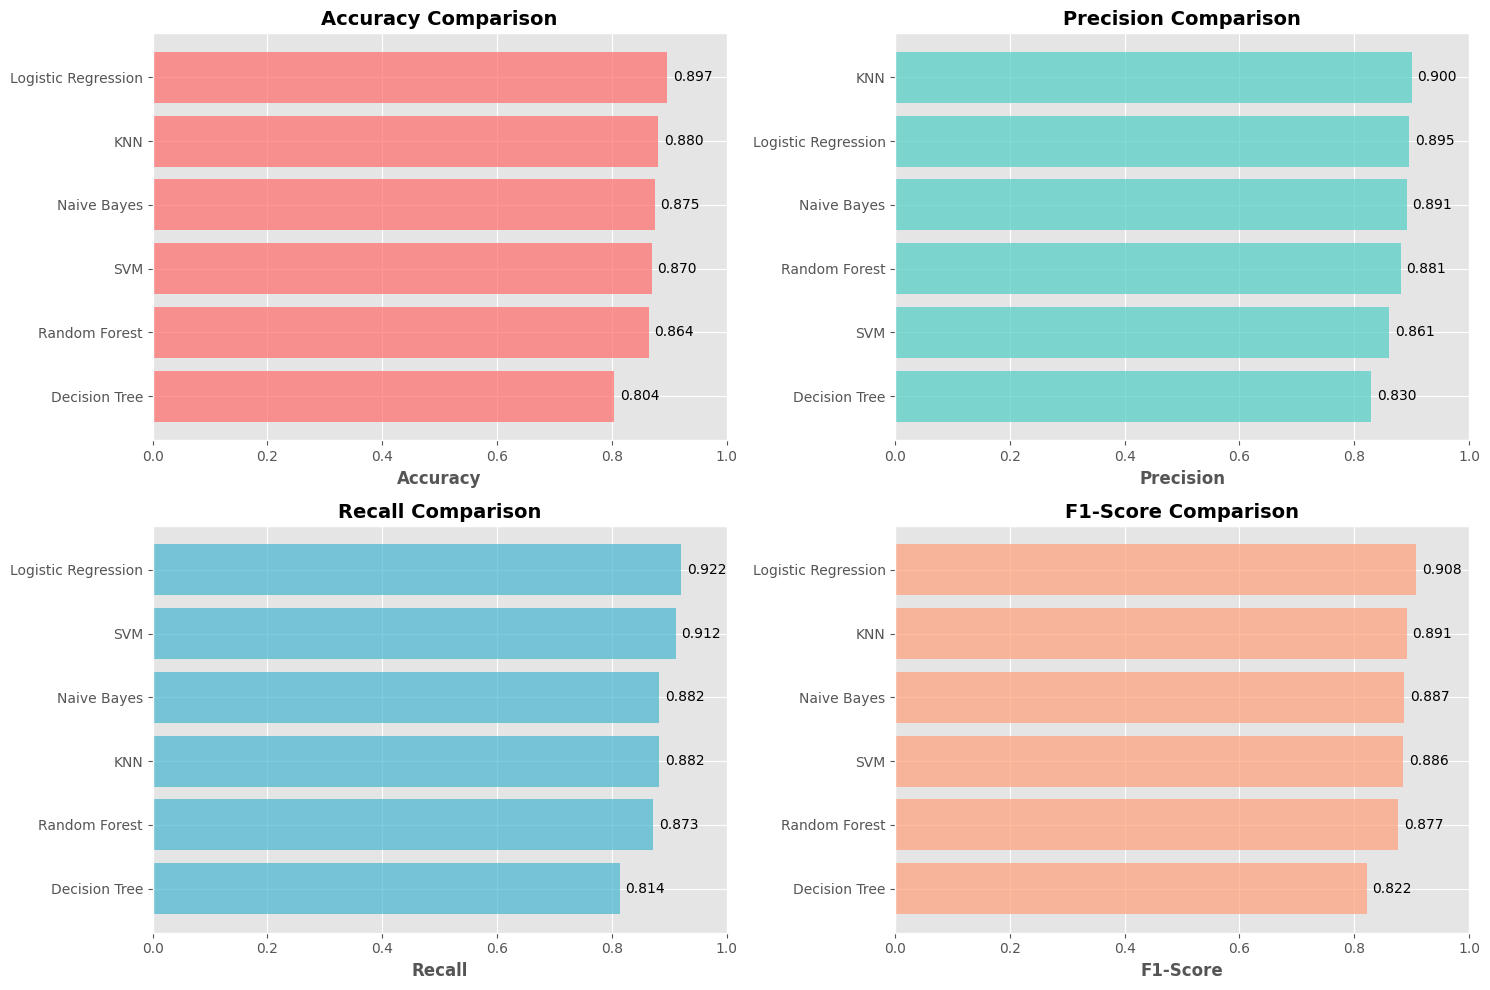

In [53]:
# Visualize model comparison
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']

for idx, (ax, metric, color) in enumerate(zip(axes.flat, metrics, colors)):
    data = comparison_df.sort_values(metric, ascending=True)
    ax.barh(data['Model'], data[metric], color=color, alpha=0.7)
    ax.set_xlabel(metric, fontsize=12, fontweight='bold')
    ax.set_title(f'{metric} Comparison', fontsize=14, fontweight='bold')
    ax.set_xlim([0, 1])

    # Add value labels
    for i, v in enumerate(data[metric]):
        ax.text(v + 0.01, i, f'{v:.3f}', va='center')

plt.tight_layout()
plt.show()

**Your Interpretation Here:**

Which model performed best? Why? What metrics did you prioritize and why?

# Visualizing Confusion Matrices

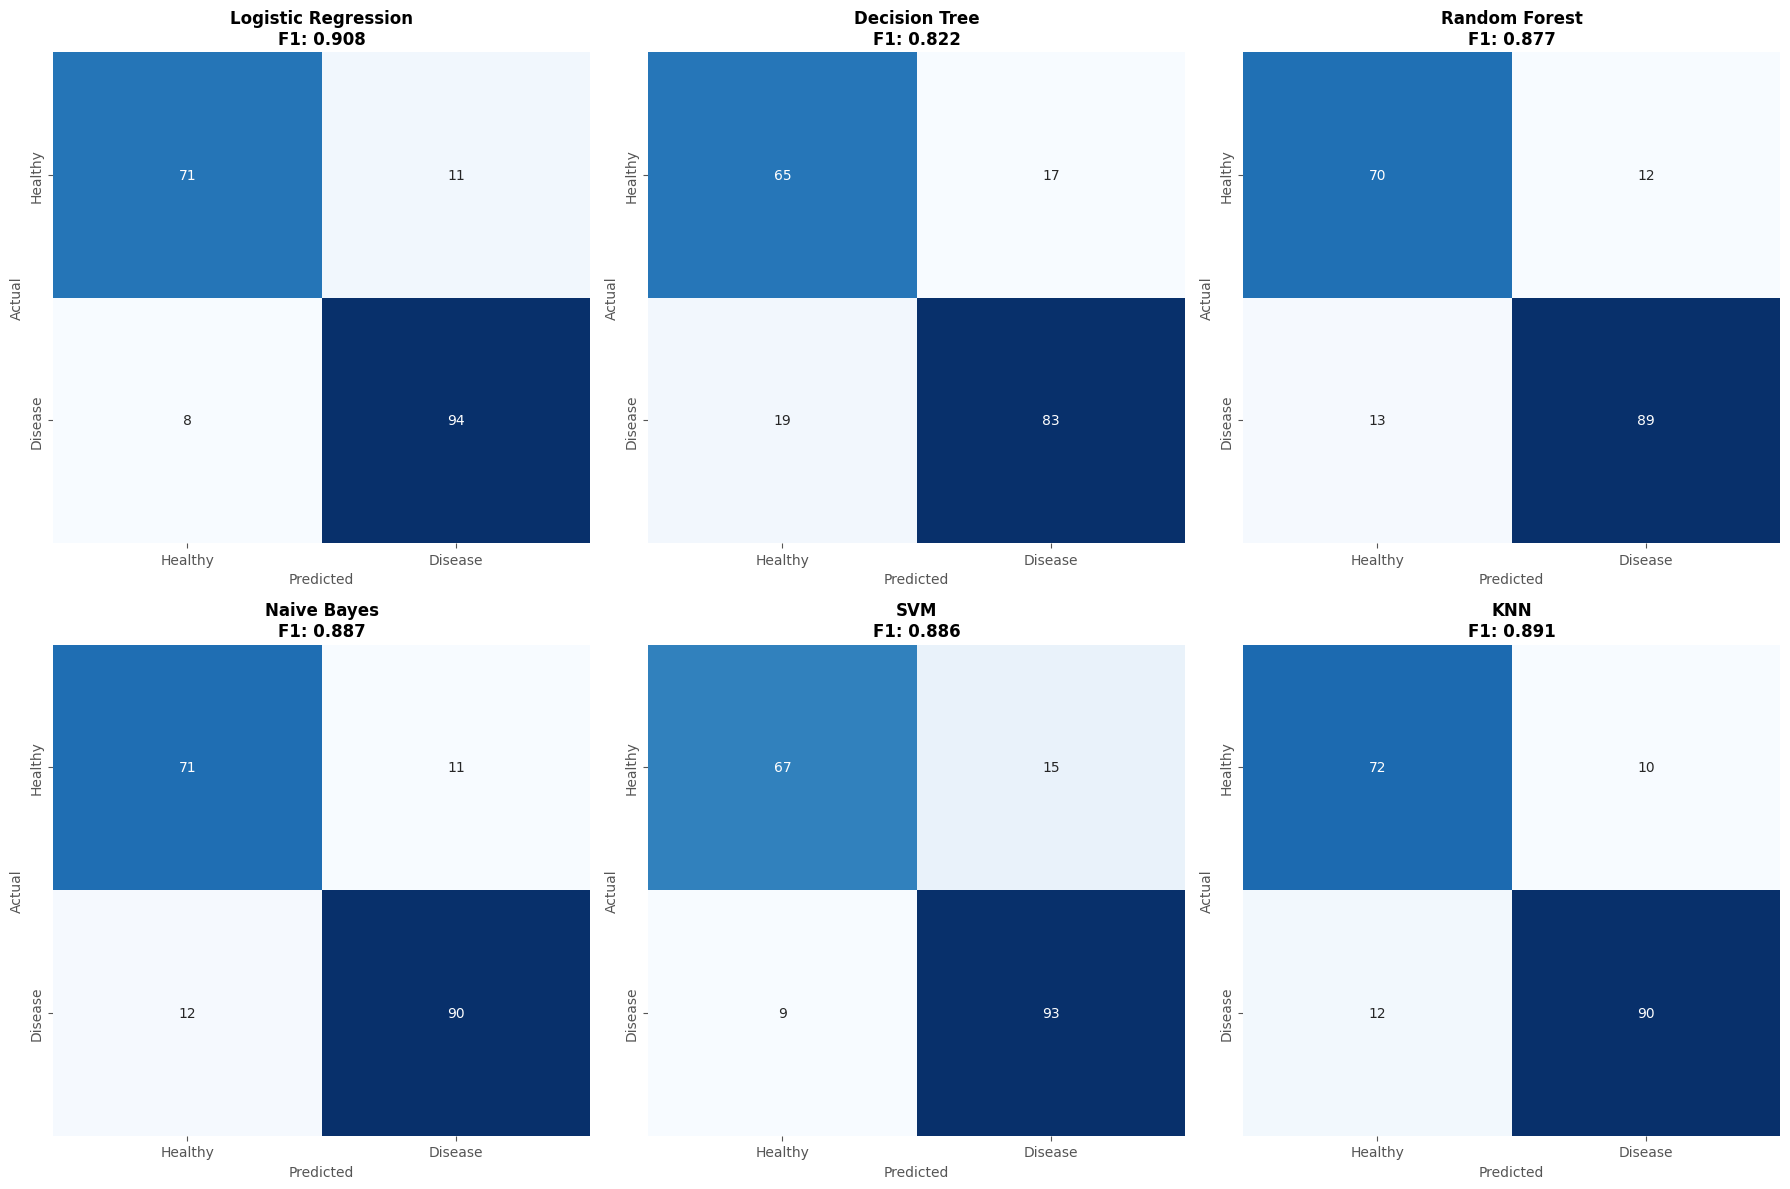

In [54]:
# Plot confusion matrices for all models
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for idx, (model_name, result) in enumerate(results.items()):
    cm = result['confusion_matrix']

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Healthy', 'Disease'],
                yticklabels=['Healthy', 'Disease'],
                ax=axes[idx], cbar=False)

    axes[idx].set_title(f'{model_name}\nF1: {result["f1"]:.3f}',
                        fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Actual', fontsize=10)
    axes[idx].set_xlabel('Predicted', fontsize=10)

plt.tight_layout()
plt.show()

# Feature Importance: What Matters Most?

Tree-based models (Decision Tree, Random Forest) can tell us **which features** are most important for predictions!

## How it works:
- Measures how much each feature **reduces uncertainty** (impurity)
- Higher importance = feature is used more often for splitting
- Helps understand what the model learned

## Why it's useful:
- ✅ Understand model decisions
- ✅ Identify key risk factors  
- ✅ Feature selection (remove unimportant features)
- ✅ Medical insights (what causes heart disease?)


Feature Importance (Random Forest):
       Feature  Importance
      ST_Slope    0.375487
 ChestPainType    0.153277
ExerciseAngina    0.128995
       Oldpeak    0.109756
         MaxHR    0.091343
     FastingBS    0.029663
   Cholesterol    0.029400
           Sex    0.028563
           Age    0.026707
     RestingBP    0.020833
    RestingECG    0.005975


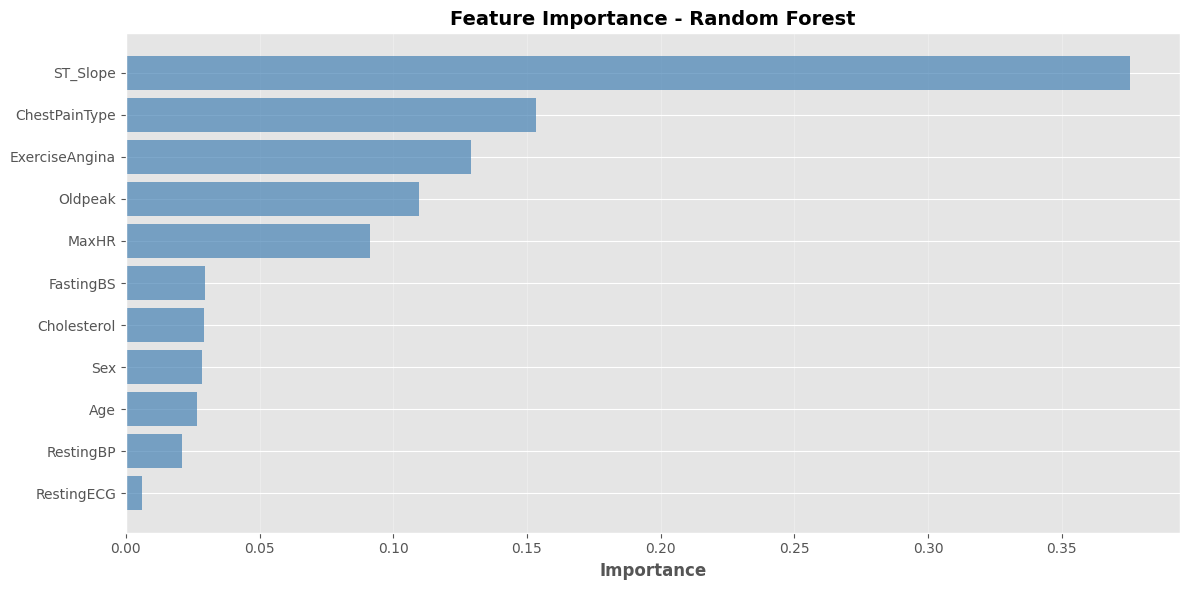

In [55]:
# Get feature importance from Random Forest (usually most reliable)
feature_importance = pd.DataFrame({
    'Feature': X_train_label.columns,
    'Importance': forest.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance (Random Forest):")
print("="*50)
print(feature_importance.to_string(index=False))

# Visualize
plt.figure(figsize=(12, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'],
         color='steelblue', alpha=0.7)
plt.xlabel('Importance', fontsize=12, fontweight='bold')
plt.title('Feature Importance - Random Forest', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

**Your Interpretation Here:**

Which features are most important? Does this align with medical knowledge? Are there any surprises?

# Cross-Validation: More Robust Evaluation

## The Problem with Single Train-Test Split:
- Results depend on **which samples** ended up in test set
- Lucky/unlucky split can make models look better/worse
- Not using all data for training AND testing

## Cross-Validation Solution:

**K-Fold Cross-Validation** (typically K=5 or K=10):

```
Fold 1: [Test] [Train] [Train] [Train] [Train]
Fold 2: [Train] [Test] [Train] [Train] [Train]
Fold 3: [Train] [Train] [Test] [Train] [Train]
Fold 4: [Train] [Train] [Train] [Test] [Train]
Fold 5: [Train] [Train] [Train] [Train] [Test]

Final Score = Average of all 5 folds
```

## Benefits:
- ✅ More reliable estimate of performance
- ✅ Uses all data for both training and testing
- ✅ Reduces variance in results
- ✅ Shows standard deviation (how stable is the model?)

## Trade-off:
- Takes K times longer (trains K models instead of 1)
- But gives much more confidence in results!

<img src="https://miro.medium.com/v2/resize:fit:1400/1*rgba1BIOUys7wQcXcL4U5A.png" width="500">

In [56]:
# Perform 5-fold cross-validation on our best models
print("\n" + "="*70)
print("                    5-FOLD CROSS-VALIDATION RESULTS")
print("="*70 + "\n")

cv_results = {}



# Logistic Regression
log_scores = cross_val_score(log_reg, X_train_scaled, y_train_onehot, cv=5, scoring='f1')
cv_results['Logistic Regression'] = log_scores
print(f"Logistic Regression:")
print(f"  Scores: {log_scores}")
print(f"  Mean F1: {log_scores.mean():.4f} (+/- {log_scores.std() * 2:.4f})\n")

# SVM
svm_scores = cross_val_score(svm, X_train_scaled, y_train_onehot, cv=5, scoring='f1')
cv_results['SVM'] = svm_scores
print(f"SVM:")
print(f"  Scores: {svm_scores}")
print(f"  Mean F1: {svm_scores.mean():.4f} (+/- {svm_scores.std() * 2:.4f})\n")

# Random Forest
forest_scores = cross_val_score(forest, X_train_label, y_train_label, cv=5, scoring='f1')
cv_results['Random Forest'] = forest_scores
print(f"Random Forest:")
print(f"  Scores: {forest_scores}")
print(f"  Mean F1: {forest_scores.mean():.4f} (+/- {forest_scores.std() * 2:.4f})\n")



                    5-FOLD CROSS-VALIDATION RESULTS

Logistic Regression:
  Scores: [0.9047619  0.86075949 0.86419753 0.85714286 0.82840237]
  Mean F1: 0.8631 (+/- 0.0488)

SVM:
  Scores: [0.9005848  0.87116564 0.8969697  0.84662577 0.84571429]
  Mean F1: 0.8722 (+/- 0.0471)

Random Forest:
  Scores: [0.9112426  0.86956522 0.87116564 0.85714286 0.85393258]
  Mean F1: 0.8726 (+/- 0.0409)



## **Training Set, Validation Set, Testing Set**

When we build machine learning models, we do not use all the data in the same way.  
We split the data so that learning, model selection, and final evaluation are kept separate.  
Each split has a specific role and answers a different question.

- The **training set** is used to learn the model parameters.
- The **validation set** is used to compare models or hyperparameters and decide which one is better.
- The **test set** is used only once, at the end, to estimate how well the chosen model generalizes to unseen data.


<img src="https://miro.medium.com/1*OECM6SWmlhVzebmSuvMtBg.png">

# Hyperparameter Tuning: Optimizing Performance

## What are Hyperparameters?

Settings you choose **before** training that control how the model learns:

### Random Forest Hyperparameters:
- `n_estimators`: Number of trees (more = better, but slower)
- `max_depth`: How deep each tree can grow
- `min_samples_split`: Minimum samples needed to split a node
- `min_samples_leaf`: Minimum samples in a leaf node

### KNN Hyperparameters:
- `n_neighbors`: Number of neighbors (K value)
- `weights`: All equal or weighted by distance?
- `metric`: Distance metric to use

### SVM Hyperparameters:
- `C`: Regularization (higher = more complex)
- `gamma`: Kernel coefficient (how far influence reaches)
- `kernel`: Type of decision boundary (linear, rbf, poly)

## Grid Search:
Try **all combinations** of hyperparameters and pick the best!

```python
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15]
}
# Tests: 3 × 3 = 9 combinations
```

## Warning:
- Can be SLOW with many parameters
- Use small grid for learning
- Cross-validation inside makes it even slower!

### What happens in this GridSearchCV example (mental model)

- Start with a **train / test split**
  - `X_train_label, y_train_label` → used for tuning and training
  - `X_test_label, y_test_label` → kept untouched until the end

- Define a **hyperparameter grid**
  - 108 different Random Forest configurations
  - Each configuration is a different “model recipe”

- Call `grid_search.fit(X_train_label, y_train_label)`
  - GridSearchCV only sees the **training set**

- Inside GridSearchCV:
  - Split the training set into **5 CV folds**
  - For each hyperparameter combination:
    - Train on 4 folds
    - Validate on 1 fold
    - Repeat until each fold has been validation once
    - Average the 5 F1 scores → one CV score per combination

- Compare all combinations
  - Select the one with the **highest mean CV F1**

- **Refit step (automatic)**
  - Take the best hyperparameters
  - Train one final model on **100% of the training data**
  - Store it as `best_estimator_`

- Final evaluation
  - Use `best_estimator_` to predict on the **test set**
  - Compute test F1 once
  - This is the honest performance estimate

- Key takeaway
  - CV folds are **validation**, not the real test
  - The test set is used **only once**, at the very end


In [57]:
# Hyperparameter tuning for Random Forest
print("Hyperparameter Tuning for Random Forest...\n")

# Define parameter grid (keeping it small for speed)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,                    # 5-fold cross-validation
    scoring='f1',            # Optimize for F1-score
    n_jobs=-1,               # Use all CPU cores
    verbose=1
)

# Fit (this might take a while!)
print(f"Testing {len(param_grid['n_estimators']) * len(param_grid['max_depth']) * len(param_grid['min_samples_split']) * len(param_grid['min_samples_leaf'])} combinations...")
grid_search.fit(X_train_label, y_train_label)

# Best parameters
print("\n" + "="*60)
print("BEST PARAMETERS FOUND:")
print("="*60)
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")

print(f"\nBest F1-Score (Cross-Validation): {grid_search.best_score_:.4f}")

# Test on test set
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test_label)
test_f1 = f1_score(y_test_label, y_pred_best)
print(f"Test Set F1-Score: {test_f1:.4f}")
print("="*60)

Hyperparameter Tuning for Random Forest...

Testing 108 combinations...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

BEST PARAMETERS FOUND:
  max_depth: None
  min_samples_leaf: 1
  min_samples_split: 2
  n_estimators: 50

Best F1-Score (Cross-Validation): 0.8788
Test Set F1-Score: 0.8725



## Your Task:
Perform Hyperparameter Tuning using GridSearchCV for your **TOP 3 Models** so far (the ones with better score from simple CV you performed above)

- Use Hypeparameters mentioned above for RANDOM FOREST, SVM, KNN. If you have
another model in the top 3 perform the relevant research on the most important
hyperparameters needing tuning. You **don't have to have** 108 combinations for every model, you might just have 20 or less, do not worry about that.


In [58]:
# Hyperparameter tuning for 2nd Model
print("Hyperparameter Tuning for SVM...\n")

# Define parameter grid for 2nd Model
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly']
}
# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=SVC(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)
# Fit (this might take a while!)
print(f"Testing {len(param_grid['C']) * len(param_grid['gamma']) * len(param_grid['kernel'])} combinations...")
grid_search.fit(X_train_scaled, y_train_onehot)

# Best parameters
print("\n" + "="*60)
print("BEST PARAMETERS FOUND:")
print("="*60)
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")

print(f"\nBest F1-Score (Cross-Validation): {grid_search.best_score_:.4f}")

# Test on test set
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test_scaled)
test_f1 = f1_score(y_test_onehot, y_pred_best)
print(f"Test Set F1-Score: {test_f1:.4f}")
print("="*60)


Hyperparameter Tuning for SVM...

Testing 42 combinations...
Fitting 5 folds for each of 42 candidates, totalling 210 fits

BEST PARAMETERS FOUND:
  C: 1
  gamma: auto
  kernel: rbf

Best F1-Score (Cross-Validation): 0.8765
Test Set F1-Score: 0.8713


In [59]:
# Hyperparameter tuning for 3rd Model
print("Hyperparameter Tuning for KNN...\n")

# Define parameter grid for 3rd Model
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}


# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

# Fit (this might take a while!)
print(f"Testing {len(param_grid['n_neighbors']) * len(param_grid['weights']) * len(param_grid['metric'])} combinations...")
grid_search.fit(X_train_scaled, y_train_onehot)

# Best parameters
print("\n" + "="*60)
print("BEST PARAMETERS FOUND:")
print("="*60)
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")

print(f"\nBest F1-Score (Cross-Validation): {grid_search.best_score_:.4f}")

# Test on test set
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test_scaled)
test_f1 = f1_score(y_test_onehot, y_pred_best)
print(f"Test Set F1-Score: {test_f1:.4f}")
print("="*60)


Hyperparameter Tuning for KNN...

Testing 66 combinations...
Fitting 5 folds for each of 66 candidates, totalling 330 fits

BEST PARAMETERS FOUND:
  metric: manhattan
  n_neighbors: 15
  weights: uniform

Best F1-Score (Cross-Validation): 0.8761
Test Set F1-Score: 0.9064


All the models had similar F1-Score in the Cross-Validation, but their F1-Scores for the test set were different. The best F1-Score out of all the 3 best models (Random Forest, SVM, KNN) after hypermater tuning was KNN with a score of 0.9366.

# Final Model Selection & Insights

## 📊 Dataset Information
- **Total Samples**: 918
- **Training Samples**: 734
- **Test Samples**: 184
- **Number of Features**: 11

## 🏆 Best Performing Model
- **Model**: KNN
- **F1-Score**: 0.9064

## 📈 Top 3 Most Important Features
1. ST_Slope
2. ChestPainType
3. ExerciseAngina

## 💡 Key Insights
1. There are certain that features that are more important than others for predicting heart disease.
2. Sometimes accuracy is not the best indicator of how good a model is and we have to consider other measures as well.
3. We should cross-validate between different parameters of different models so that we get the one with the best accuracy.

## 🎯 Recommendations
- This project could help doctors to predict whether a patient ha heart disease or not.
- It could also could give some reccomendations on how people can change their nutrition to avoid having a heart disease.
- Patients could input the required features (or most of them) and know the probability they have heart disease.

## 🔭 How could/would you improve this Project ?
- It could give recommendations on how people can change their diets baesd on the values of the features.
- If there are any null values I should add a way so that null value are handles.

## 🏁 Final Comment on the Project
- This project could be very helpful in assisting doctors identifying which people have heart disease and who do not, but I still believe some changes could be made to make it even better.